In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score,StratifiedKFold,KFold
from sklearn.feature_selection import SelectKBest,f_classif,SelectFdr
from sklearn import svm
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize,RobustScaler,StandardScaler
from sklearn.cluster import KMeans
from lifelines import CoxPHFitter
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import backend
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import glorot_uniform,RandomUniform,Constant
from scipy.stats import spearmanr

GDSC

In [2]:
# load genes in GDSC OXA dataset
genes = pd.read_csv("genes_GDSC_oxa.csv")
genes

Unnamed: 0 Unnamed: 0.1
0               0       TSPAN6
1               1         DPM1
2               2        SCYL3
3               3          FGR
4               4          CFH
...           ...          ...
10227       10227    LINC00657
10228       10228          MIA
10229       10229    LINC00514
10230       10230    LINC00526
10231       10231       UBL5P2

[10232 rows x 2 columns]

IMPRESS

In [3]:
# load gse dataset
impress = pd.read_csv("cellNorm22cpm_input.csv")
impress = impress.set_index(['Unnamed: 0'])
impress

TSPAN6      TNMD      DPM1     SCYL3  C1orf112  FGR       CFH  \
Unnamed: 0                                                                    
GS.802      6.142303 -1.761883  6.238693  4.615545  5.067942    0 -3.160422   
GS.295      6.081011 -3.160422  6.178049  4.665697  4.582609    0  1.039597   
GS.598      5.973943 -3.160422  5.411198  4.489564  4.494100    0  3.840939   
GS.359      5.697562 -3.160422  5.937262  4.208244  3.829931    0 -3.160422   
GS.786      5.534586 -2.717335  5.860319  4.445250  4.972458    0  2.181070   
GS.799      6.832313 -1.506272  6.099326  4.401022  4.952996    0  6.942056   
GS.502      5.517285 -1.941725  5.348823  4.242534  4.558786    0  4.096808   
GS.828      5.712526 -2.597850  5.365842  4.375322  4.352902    0  3.173043   
GS.507      5.523846 -3.160422  5.573481  4.601000  4.862926    0 -0.124912   
GS.365      5.531540 -3.160422  5.870474  3.989988  4.648827    0  2.396516   
GS.353      5.275077 -3.160422  5.804833  3.835568  5.180088    0  1.314898   
GS.820      5.368194 -3.160422  5.971555  4.601827  4.870485    0  4.863753   
GS.691      5.607398 -3.160422  6.485675  4.246032  4.986126    0  0.246177   
GS.607      5.626006 -3.160422  6.453412  4.011288  5.063198    0  1.432262   
GS.824      4.969876 -3.160422  5.970765  4.573750  4.578301    0  2.467156   
GS.741      6.136360 -1.660152  6.419844  4.221773  4.129240    0 -3.160422   
GS.636      5.729064 -3.160422  6.046924  3.628057  4.567995    0  3.574782   
GS.772      5.321963 -3.160422  5.487617  4.081945  4.759824    0 -0.061452   
GS.832      6.206561 -3.160422  6.005395  4.468154  5.007905    0  1.084287   
GS.944      0.062530 -3.160422  6.186718  4.156105  4.904496    0  0.062530   
GS.851      5.911895 -3.160422  5.728812  3.854323  4.100488    0 -3.160422   
GS.627      4.930072 -3.160422  6.501398  3.919374  5.032678    0 -0.280255   

               FUCA2      GCLC      NFYA  ...  LINC00514  OR1D5    ZNF234  \
Unnamed: 0                                ...                               
GS.802      4.850279  4.468255  5.393102  ...  -3.160422      0  4.604734   
GS.295      5.234283  4.294598  5.008302  ...  -2.421923      0  3.264026   
GS.598      5.467636  4.686699  5.826187  ...  -3.160422      0  4.646519   
GS.359      6.117203  4.836042  5.841040  ...  -3.160422      0  4.232245   
GS.786      6.685488  4.396504  5.720995  ...  -3.160422      0  3.648075   
GS.799      6.012090  5.007873  5.762113  ...  -3.160422      0  4.106370   
GS.502      5.770738  3.496134  5.773677  ...  -1.941725      0  4.769770   
GS.828      4.802271  4.142446  5.111402  ...  -2.597850      0  4.326297   
GS.507      5.597672  3.868460  4.977976  ...  -0.124912      0  4.019358   
GS.365      5.414395  4.216067  5.269203  ...  -2.722730      0  4.448613   
GS.353      5.804833  4.429051  5.601273  ...  -3.160422      0  3.705179   
GS.820      4.850195  5.251853  5.614628  ...  -3.160422      0  4.069770   
GS.691      6.163851  4.997814  5.391054  ...  -1.614013      0  3.327340   
GS.607      5.496186  4.521199  5.098640  ...  -3.160422      0  3.477257   
GS.824      5.237817  4.224773  4.884249  ...  -3.160422      0  3.886036   
GS.741      5.973696  4.140439  5.031445  ...  -3.160422      0  4.054245   
GS.636      5.597239  4.149161  5.099736  ...  -3.160422      0  3.500542   
GS.772      5.938310  4.595913  5.544324  ...  -3.160422      0  4.003220   
GS.832      6.029359  4.880197  5.049122  ...  -3.160422      0  3.569954   
GS.944      5.517336  4.712620  5.426417  ...  -3.160422      0  0.062530   
GS.851      5.490573  4.374485  5.370590  ...  -3.160422      0  4.174018   
GS.627      6.127707  4.501970  5.143833  ...  -0.740023      0  3.125312   

            MYH4  LINC00526  PPY2  KRT18P55  POLRMTP1    UBL5P2  TBC1D3P5  
Unnamed: 0                                                                 
GS.802         0   2.893857     0 -2.532397 -0.244829 -2.532397         0  
GS.295         0   3.206767     0 -3.160

In [4]:
# make the order of the genes consistent to GDSC
impress = impress.reindex(columns = genes["Unnamed: 0.1"])
impress

Unnamed: 0.1    TSPAN6      DPM1     SCYL3  FGR       CFH     FUCA2      GCLC  \
Unnamed: 0                                                                      
GS.802        6.142303  6.238693  4.615545    0 -3.160422  4.850279  4.468255   
GS.295        6.081011  6.178049  4.665697    0  1.039597  5.234283  4.294598   
GS.598        5.973943  5.411198  4.489564    0  3.840939  5.467636  4.686699   
GS.359        5.697562  5.937262  4.208244    0 -3.160422  6.117203  4.836042   
GS.786        5.534586  5.860319  4.445250    0  2.181070  6.685488  4.396504   
GS.799        6.832313  6.099326  4.401022    0  6.942056  6.012090  5.007873   
GS.502        5.517285  5.348823  4.242534    0  4.096808  5.770738  3.496134   
GS.828        5.712526  5.365842  4.375322    0  3.173043  4.802271  4.142446   
GS.507        5.523846  5.573481  4.601000    0 -0.124912  5.597672  3.868460   
GS.365        5.531540  5.870474  3.989988    0  2.396516  5.414395  4.216067   
GS.353        5.275077  5.804833  3.835568    0  1.314898  5.804833  4.429051   
GS.820        5.368194  5.971555  4.601827    0  4.863753  4.850195  5.251853   
GS.691        5.607398  6.485675  4.246032    0  0.246177  6.163851  4.997814   
GS.607        5.626006  6.453412  4.011288    0  1.432262  5.496186  4.521199   
GS.824        4.969876  5.970765  4.573750    0  2.467156  5.237817  4.224773   
GS.741        6.136360  6.419844  4.221773    0 -3.160422  5.973696  4.140439   
GS.636        5.729064  6.046924  3.628057    0  3.574782  5.597239  4.149161   
GS.772        5.321963  5.487617  4.081945    0 -0.061452  5.938310  4.595913   
GS.832        6.206561  6.005395  4.468154    0  1.084287  6.029359  4.880197   
GS.944        0.062530  6.186718  4.156105    0  0.062530  5.517336  4.712620   
GS.851        5.911895  5.728812  3.854323    0 -3.160422  5.490573  4.374485   
GS.627        4.930072  6.501398  3.919374    0 -0.280255  6.127707  4.501970   

Unnamed: 0.1      NFYA    NIPAL3     ENPP4  ...      CUX1   UBE2CP1     CEP95  \
Unnamed: 0                                  ...                                 
GS.802        5.393102  5.446554 -3.160422  ...  7.819895 -2.532397  5.501986   
GS.295        5.008302  6.812552  4.682596  ...  6.545577 -2.421923  5.193600   
GS.598        5.826187  4.771343  3.654974  ...  8.616746 -1.792433  5.079695   
GS.359        5.841040  7.013301 -0.172891  ...  7.803821 -3.160422  5.086990   
GS.786        5.720995  5.289655 -0.567512  ...  7.888661 -2.717335  4.894639   
GS.799        5.762113  5.245620  5.378579  ...  7.123841 -3.160422  5.558449   
GS.502        5.773677  6.810392 -2.747000  ...  8.805369 -2.747000  4.836883   
GS.828        5.111402  6.967383 -3.160422  ...  8.091318 -1.879050  5.155250   
GS.507        4.977976  6.654832 -3.160422  ...  7.921730 -0.124912  5.306239   
GS.365        5.269203  6.834936  0.088484  ...  8.661831 -3.160422  4.818543   
GS.353        5.601273  6.284877 -2.666230  ...  7.598097 -3.160422  5.156255   
GS.820        5.614628  5.663895  3.800454  ...  7.212705 -2.474485  5.287500   
GS.691        5.391054  6.426366 -2.338013  ...  7.694124 -3.160422  5.077082   
GS.607        5.098640  5.508926 -2.809537  ...  7.153378 -3.160422  4.631064   
GS.824        4.884249  6.135780  3.833701  ...  7.633245 -3.160422  4.987092   
GS.741        5.031445  5.179943 -0.763286  ...  7.557990 -2.473673  5.488983   
GS.636        5.099736  6.421041  0.427089  ...  7.013949 -3.160422  5.074369   
GS.772        5.544324  6.501066 -3.160422  ...  7.787794 -3.160422  5.026557   
GS.832        5.049122  5.036565 -3.160422  ...  7.679318 -3.160422  5.266344   
GS.944        5.426417  5.709540 -3.160422  ...  6.944803  0.062530  4.948727   
GS.851        5.370590  5.401534 -3.160422  ...  7.899082  0.012655  4.707294   
GS.627        5.143833  6.894654 -2.743733  ...  7.197476 -2.743733  4.956415   

Unnamed: 0.1     SMIM6    MRPL46  LINC00657       MIA  LINC00514  LINC00526  \
Unnamed: 0                     

In [6]:
# load GSE AUC 
auc = pd.read_csv("tmz paper_screening data and survival data_IN_12Nov21.csv")
auc = auc.set_index(['GS.number'])
auc = auc.reindex(impress.index)
auc

GT.code  PFS_months  OS_months  TMZ_IC50(uM)     AUC  \
Unnamed: 0                                                                   
GS.802      GT-03-38-01-WT-02        15.9       29.0           12.7   7348   
GS.295      GT-03-50-01-WT-02         6.0       35.7           17.9  10456   
GS.598      GT-03-02-01-WT-02         6.3        7.4           39.7  13565   
GS.359      GT-03-51-01-WT-02        36.4       37.4           88.6  17673   
GS.786      GT-03-07-01-WT-02         1.9        2.8          104.7  18229   
GS.799      GT-03-08-01-WT-02         5.7        7.9          166.7  20589   
GS.502      GT-03-24-01-WT-02         6.2       22.0          263.5  23345   
GS.828      GT-03-42-01-WT-02         8.4       10.0          264.1  24481   
GS.507      GT-03-25-01-WT-02        13.0       27.0           60.0  27070   
GS.365      GT-03-18-01-WT-02         6.5       11.1          148.7  18381   
GS.353      GT-03-17-01-WT-02         6.0        9.8          223.2  22839   
GS.820      GT-03-40-01-WT-02         5.4       12.4          214.2  23704   
GS.691      GT-03-05-01-WT-02         4.4        6.9          662.0  29259   
GS.607      GT-03-03-01-WT-02         6.7        8.6          287.8  27102   
GS.824      GT-03-41-01-WT-02        10.8       11.9          409.4  29690   
GS.741      GT-03-37-01-WT-02        17.9       25.4          545.5  31672   
GS.636      GT-03-30-01-WT-02        12.3       17.0          628.3  36268   
GS.772      GT-03-06-01-WT-02         6.7        7.7          260.5  26792   
GS.832      GT-03-43-01-WT-02         6.6       17.6          238.0  25417   
GS.944      GT-03-10-01-WT-02         0.5        1.0          229.2  36518   
GS.851      GT-03-44-01-WT-02        10.8       15.8          371.6  34695   
GS.627      GT-03-04-01-WT-02         3.1        5.3          438.0  36133   

            % cell viability_100uM TMZ MGMT_status_tumor MGMT_status_culture  
Unnamed: 0                                                                    
GS.802                           22.42        Methylated        Unmethylated  
GS.295                           31.00      Unmethylated          Methylated  
GS.598                           36.33        Methylated        Unmethylated  
GS.359                           38.00        Methylated          Methylated  
GS.786                           50.07        Methylated          Methylated  
GS.799                           57.53      Unmethylated   Methylated (weak)  
GS.502                           69.00        Methylated          Methylated  
GS.828                           70.25      Unmethylated          Methylated  
GS.507                           72.43        Methylated                 NaN  
GS.365                           74.33      Unmethylated        Unmethylated  
GS.353                           75.67        Methylated        Unmethylated  
GS.820                           83.25      Unmethylated   Methylated (weak)  
GS.691                           84.33        Methylated          Methylated  
GS.607                           86.67        Methylated        Unmethylated  
GS.824                           88.90        Methylated          Methylated  
GS.741                           89.00      Unmethylated        Unmethylated  
GS.636                           91.94      Unmethylated        Unmethylated  
GS.772                           92.33        Methylated          Methylated  
GS.832                           92.65      Unmethylated        Unmethylated  
GS.944                           97.30        Methylated                 NaN  
GS.851                          108.30      Unmethylated         Methylated   
GS.627                          111.33      Unmethylated        Unmethylated

(array([1., 1., 1., 3., 1., 4., 4., 2., 1., 4.]),
 array([ 7348., 10265., 13182., 16099., 19016., 21933., 24850., 27767.,
        30684., 33601., 36518.]),
 <BarContainer object of 10 artists>)

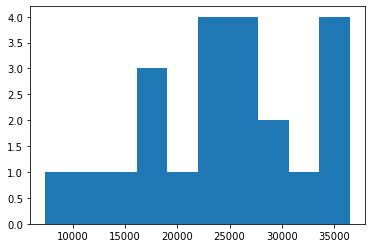

In [7]:
# AUC distribution
plt.hist(auc.AUC)

(array([1., 1., 1., 3., 1., 4., 4., 2., 1., 4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

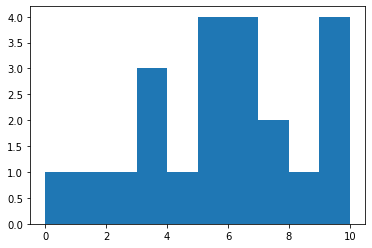

In [8]:
# linear transform AUC to the range of [0,10]
auc_norm = auc.AUC
auc_norm = (auc_norm - auc_norm.max())/(auc_norm.max() - auc_norm.min())+1
auc_norm = auc_norm*10
plt.hist(auc_norm)

In [9]:
# create a basic DL model

seed_num = 1000
init = RandomUniform(seed = seed_num)


def create_model(activation1 = "sigmoid",activation2="softplus",l2 = 0.001,l1=0.001,opt = tf.keras.optimizers.Adam(learning_rate= 0.0001)):
     
    model = Sequential()
    
    model.add(Dense(1000,activation= activation1,input_shape=(10232,),
                    kernel_regularizer=regularizers.l2(l2),
                    activity_regularizer=regularizers.l1(l1),
                    kernel_initializer= init))            
    
    model.add(Dropout(0.3))
    
    model.add(Dense(100, activation=activation2,kernel_initializer= init))
                    
    model.add(Dropout(0.1))
    
    model.add(Dense(1, activation= activation2))
        
    model.compile(loss='mean_squared_error',optimizer = opt,metrics=['mae']) #SGD
        
    return model

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
# predict loss
def plt_loss(train_loss,validate_loss,fold_no):
    plt.figure(figsize=(8, 8))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(validate_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [11]:
# load the weights from GDSC
pre_model = create_model()
pre_model.load_weights("GDSC_model_oxaliplatin.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
# normalize the GSE dataset
Standard = StandardScaler()
impress_norm = Standard.fit_transform(impress)
# predict the AUC without refining the pre-trained weights
pred_auc = pre_model.predict(impress_norm)

In [13]:
# Spearman cor
spearmanr(auc_norm,pred_auc)

SpearmanrResult(correlation=0.0942970073404856, pvalue=0.676380794270764)

In [15]:
# create a DL model
def create_model2(activation1 = "sigmoid",activation2 = "softplus",l2 = 0.0001,l1=0.0001,opt = tf.keras.optimizers.Adam(learning_rate= 0.0001)):
    
    model = Sequential()
    
    model.add(Dense(1000,activation= activation1,input_shape=(10232,),
                    kernel_regularizer=regularizers.l2(l2),
                    activity_regularizer=regularizers.l1(l1),
                    # load the pre-trained weights
                    weights = [pre_model.layers[0].get_weights()[0],pre_model.layers[0].get_weights()[1]]))            
    
    model.add(Dropout(0.3))
    
    model.add(Dense(100, activation=activation2,
                    kernel_initializer=init
                   )
             )
                    
    model.add(Dropout(0.1))
    
    model.add(Dense(1, activation= activation2, kernel_initializer=init))
        
    model.compile(loss='mse',
                  optimizer = opt,
                  metrics=['mean_absolute_error'])
        
    return model

In [18]:
# use the same partition on the dataset to ensure a fair evaluation
train_test_index = pd.read_csv("train_test_index_sort.txt", sep="[", header=None)

line = 0

train_index = [0] * 10
test_index = [0] * 10

# 10 splits with different seeds
for seed in range(0,10):
    
    train_index[seed] = [0] * 3
    test_index[seed] = [0] * 3
    
    for fold in range(0,3):
        
        # get index train
        train_index[seed][fold] = train_test_index[1][line].split()
        # string to int
        train_index[seed][fold] = [eval(i) for i in train_index[seed][fold]]
        
        # get index train
        test_index[seed][fold] = train_test_index[2][line].split()
        # string to int
        test_index[seed][fold] = [eval(i) for i in test_index[seed][fold]]
        
        line += 1

train_index

[[[0, 1, 3, 4, 7, 8, 10, 11, 12, 13, 14, 16, 17, 20],
  [0, 2, 5, 6, 8, 9, 10, 11, 13, 15, 17, 18, 19, 20, 21],
  [1, 2, 3, 4, 5, 6, 7, 9, 12, 14, 15, 16, 18, 19, 21]],
 [[0, 2, 3, 5, 7, 10, 11, 13, 14, 15, 16, 18, 20, 21],
  [0, 1, 4, 6, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20],
  [1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 17, 19, 21]],
 [[1, 2, 3, 5, 6, 9, 10, 12, 14, 15, 17, 18, 20, 21],
  [0, 1, 4, 5, 7, 8, 10, 11, 12, 13, 14, 16, 18, 19, 21],
  [0, 2, 3, 4, 6, 7, 8, 9, 11, 13, 15, 16, 17, 19, 20]],
 [[0, 3, 4, 6, 7, 8, 9, 11, 13, 15, 16, 17, 18, 21],
  [0, 1, 2, 4, 5, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20],
  [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 19, 20, 21]],
 [[0, 2, 5, 6, 7, 8, 10, 11, 13, 15, 16, 18, 19, 20],
  [1, 2, 3, 4, 7, 9, 11, 12, 13, 14, 15, 17, 18, 20, 21],
  [0, 1, 3, 4, 5, 6, 8, 9, 10, 12, 14, 16, 17, 19, 21]],
 [[0, 1, 2, 4, 5, 8, 9, 11, 12, 14, 15, 19, 20, 21],
  [0, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 20],
  [1, 2, 3, 5, 6, 7, 10, 11, 13, 15, 16, 17, 

------------------------------------------------------------------------
Training for fold 1, seed 1 ...
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 60ms/sample - loss: 31.6598 - mean_absolute_error: 4.9664 - val_loss: 36.9176 - val_mean_absolute_error: 5.4179
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.2598 - mean_absolute_error: 4.9323 - val_loss: 36.6611 - val_mean_absolute_error: 5.3951
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.1852 - mean_absolute_error: 4.9259 - val_loss: 36.3985 - val_mean_absolute_error: 5.3716
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.0104 - mean_absolute_error: 4.9007 - val_loss: 36.1360 - val_mean_absolute_error: 5.3480
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 30.8283 - mean_absolute_error: 4.8787 - val_loss: 35.8741 - val_mean_absolute_error: 5.3244
Epoch 6/200
14/1

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.2711 - mean_absolute_error: 3.7516 - val_loss: 20.6174 - val_mean_absolute_error: 3.6861
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.2057 - mean_absolute_error: 3.6678 - val_loss: 20.2932 - val_mean_absolute_error: 3.6431
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.0059 - mean_absolute_error: 3.5901 - val_loss: 19.9682 - val_mean_absolute_error: 3.5996
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.5169 - mean_absolute_error: 3.6812 - val_loss: 19.6563 - val_mean_absolute_error: 3.5572
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.8631 - mean_absolute_error: 3.4626 - val_loss: 19.3450 - val_mean_absolute_error: 3.5143
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.7055 - mean_absolute_error: 3.4705 - val_loss: 19.0293 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.8930 - mean_absolute_error: 2.5113 - val_loss: 10.2647 - val_mean_absolute_error: 2.6809
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.3396 - mean_absolute_error: 2.5410 - val_loss: 10.1683 - val_mean_absolute_error: 2.6682
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.1253 - mean_absolute_error: 2.5121 - val_loss: 10.0784 - val_mean_absolute_error: 2.6562
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.6667 - mean_absolute_error: 2.3909 - val_loss: 9.9773 - val_mean_absolute_error: 2.6424
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.3365 - mean_absolute_error: 2.4784 - val_loss: 9.8798 - val_mean_absolute_error: 2.6290
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.1104 - mean_absolute_error: 2.5392 - val_loss: 9.7927 - val_mean_absolute_error: 2.61

14/14 [==============================] - 0s 5ms/sample - loss: 6.8161 - mean_absolute_error: 2.0645 - val_loss: 7.7500 - val_mean_absolute_error: 2.2600
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.7728 - mean_absolute_error: 2.1345 - val_loss: 7.7243 - val_mean_absolute_error: 2.2540
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.8257 - mean_absolute_error: 2.0795 - val_loss: 7.6999 - val_mean_absolute_error: 2.2482
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.5930 - mean_absolute_error: 2.2400 - val_loss: 7.6844 - val_mean_absolute_error: 2.2447
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.0467 - mean_absolute_error: 2.1567 - val_loss: 7.6714 - val_mean_absolute_error: 2.2417
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9859 - mean_absolute_error: 2.1544 - val_loss: 7.6498 - val_mean_absolute_error: 2.2368
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9251 - mean_absolute_error: 2.0968 - val_loss: 7.2126 - val_mean_absolute_error: 2.1611
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.1155 - mean_absolute_error: 2.0085 - val_loss: 7.2109 - val_mean_absolute_error: 2.1610
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.5898 - mean_absolute_error: 1.9927 - val_loss: 7.2033 - val_mean_absolute_error: 2.1596
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.4825 - mean_absolute_error: 2.2052 - val_loss: 7.1980 - val_mean_absolute_error: 2.1589
Spearman correlation: 0.405


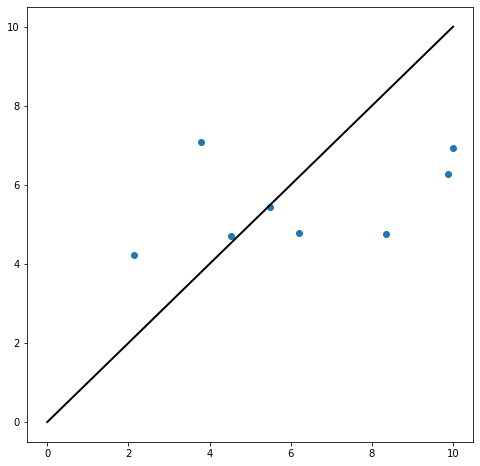

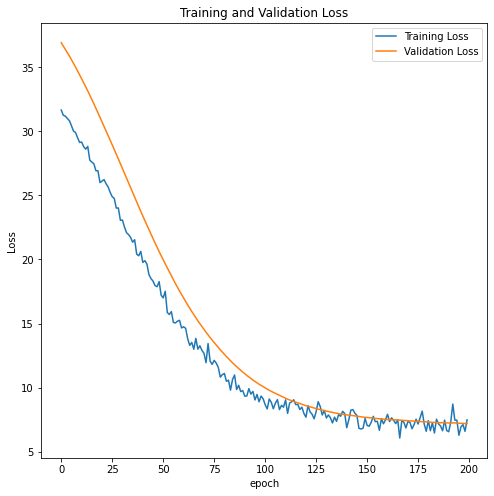

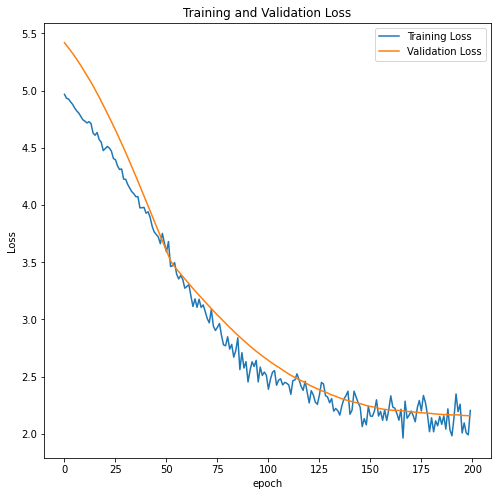

------------------------------------------------------------------------
Training for fold 2, seed 1 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 57ms/sample - loss: 34.5922 - mean_absolute_error: 5.2871 - val_loss: 31.1879 - val_mean_absolute_error: 4.7691
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.7310 - mean_absolute_error: 5.2943 - val_loss: 30.9631 - val_mean_absolute_error: 4.7453
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.1717 - mean_absolute_error: 5.2529 - val_loss: 30.7272 - val_mean_absolute_error: 4.7202
Epoch 4/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.6461 - mean_absolute_error: 5.2192 - val_loss: 30.4774 - val_mean_absolute_error: 4.6934
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.5170 - mean_absolute_error: 5.2053 - val_loss: 30.2315 - val_mean_absolute_error: 4.6669
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.5879 - mean_absolute_error: 3.5670 - val_loss: 16.7907 - val_mean_absolute_error: 3.3910
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.6006 - mean_absolute_error: 3.5998 - val_loss: 16.5292 - val_mean_absolute_error: 3.3581
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.9838 - mean_absolute_error: 3.5455 - val_loss: 16.2715 - val_mean_absolute_error: 3.3250
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.3639 - mean_absolute_error: 3.4661 - val_loss: 16.0204 - val_mean_absolute_error: 3.2922
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.5873 - mean_absolute_error: 3.4559 - val_loss: 15.7777 - val_mean_absolute_error: 3.2598
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.6517 - mean_absolute_error: 3.4426 - val_loss: 15.5406 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.6323 - mean_absolute_error: 2.2582 - val_loss: 10.1090 - val_mean_absolute_error: 2.7727
Epoch 99/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.0096 - mean_absolute_error: 2.2964 - val_loss: 10.0681 - val_mean_absolute_error: 2.7696
Epoch 100/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.0769 - mean_absolute_error: 2.2811 - val_loss: 10.0349 - val_mean_absolute_error: 2.7671
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.6472 - mean_absolute_error: 2.2372 - val_loss: 10.0043 - val_mean_absolute_error: 2.7646
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.1180 - mean_absolute_error: 2.1482 - val_loss: 9.9728 - val_mean_absolute_error: 2.7621
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3324 - mean_absolute_error: 2.1145 - val_loss: 9.9410 - val_mean_absolute_error: 2.7

15/15 [==============================] - 0s 5ms/sample - loss: 6.5581 - mean_absolute_error: 1.9608 - val_loss: 9.6044 - val_mean_absolute_error: 2.6864
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5998 - mean_absolute_error: 2.0137 - val_loss: 9.6079 - val_mean_absolute_error: 2.6855
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.4411 - mean_absolute_error: 2.1984 - val_loss: 9.6069 - val_mean_absolute_error: 2.6848
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5791 - mean_absolute_error: 1.8432 - val_loss: 9.6081 - val_mean_absolute_error: 2.6844
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4133 - mean_absolute_error: 1.9569 - val_loss: 9.6082 - val_mean_absolute_error: 2.6840
Epoch 152/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.4283 - mean_absolute_error: 2.0166 - val_loss: 9.6079 - val_mean_absolute_error: 2.6831
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5109 - mean_absolute_error: 1.8098 - val_loss: 9.7045 - val_mean_absolute_error: 2.6591
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.6875 - mean_absolute_error: 1.8491 - val_loss: 9.7115 - val_mean_absolute_error: 2.6587
Epoch 199/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.8578 - mean_absolute_error: 2.0850 - val_loss: 9.7105 - val_mean_absolute_error: 2.6589
Epoch 200/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.5856 - mean_absolute_error: 1.8132 - val_loss: 9.7165 - val_mean_absolute_error: 2.6586
Spearman correlation: -0.143


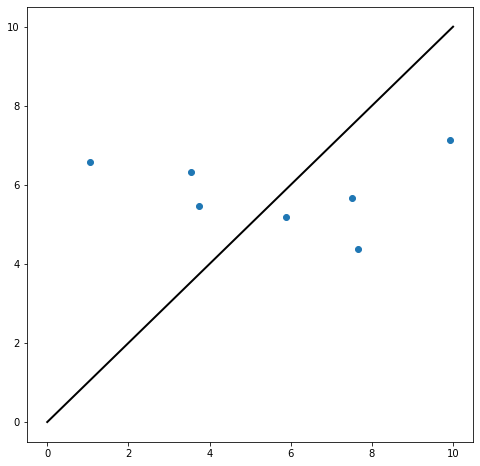

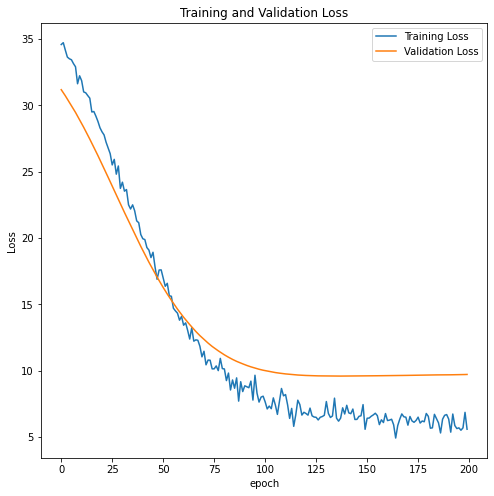

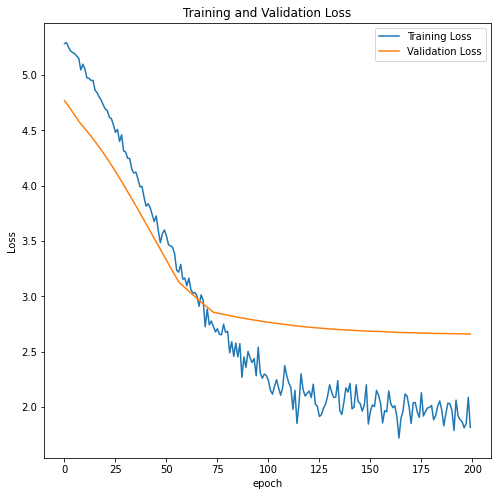

------------------------------------------------------------------------
Training for fold 3, seed 1 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 60ms/sample - loss: 34.6603 - mean_absolute_error: 5.1628 - val_loss: 31.5773 - val_mean_absolute_error: 5.1187
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.0171 - mean_absolute_error: 5.0949 - val_loss: 31.3318 - val_mean_absolute_error: 5.0998
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.9148 - mean_absolute_error: 5.1055 - val_loss: 31.0821 - val_mean_absolute_error: 5.0806
Epoch 4/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.5664 - mean_absolute_error: 5.0503 - val_loss: 30.8297 - val_mean_absolute_error: 5.0610
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.4335 - mean_absolute_error: 5.0415 - val_loss: 30.5707 - val_mean_absolute_error: 5.0408
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.1041 - mean_absolute_error: 3.5334 - val_loss: 16.2106 - val_mean_absolute_error: 3.6703
Epoch 50/200
15/15 [==============================] - 0s 4ms/sample - loss: 18.0455 - mean_absolute_error: 3.4957 - val_loss: 15.9176 - val_mean_absolute_error: 3.6341
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.1273 - mean_absolute_error: 3.4197 - val_loss: 15.6344 - val_mean_absolute_error: 3.5985
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.1989 - mean_absolute_error: 3.4107 - val_loss: 15.3542 - val_mean_absolute_error: 3.5626
Epoch 53/200
15/15 [==============================] - 0s 4ms/sample - loss: 16.6170 - mean_absolute_error: 3.3049 - val_loss: 15.0751 - val_mean_absolute_error: 3.5263
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.3285 - mean_absolute_error: 3.3624 - val_loss: 14.8085 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.4919 - mean_absolute_error: 2.3372 - val_loss: 8.2786 - val_mean_absolute_error: 2.2777
Epoch 99/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.5929 - mean_absolute_error: 2.4539 - val_loss: 8.2185 - val_mean_absolute_error: 2.2656
Epoch 100/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.9345 - mean_absolute_error: 2.2839 - val_loss: 8.1661 - val_mean_absolute_error: 2.2548
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.4598 - mean_absolute_error: 2.4390 - val_loss: 8.1259 - val_mean_absolute_error: 2.2459
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.1348 - mean_absolute_error: 2.5041 - val_loss: 8.0840 - val_mean_absolute_error: 2.2364
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.0686 - mean_absolute_error: 2.3589 - val_loss: 8.0320 - val_mean_absolute_error: 2.2247


15/15 [==============================] - 0s 4ms/sample - loss: 7.3469 - mean_absolute_error: 2.2028 - val_loss: 7.4223 - val_mean_absolute_error: 2.0303
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9975 - mean_absolute_error: 2.1631 - val_loss: 7.4197 - val_mean_absolute_error: 2.0297
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5156 - mean_absolute_error: 2.2527 - val_loss: 7.4206 - val_mean_absolute_error: 2.0294
Epoch 150/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.0782 - mean_absolute_error: 2.2038 - val_loss: 7.4252 - val_mean_absolute_error: 2.0294
Epoch 151/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.8480 - mean_absolute_error: 2.1585 - val_loss: 7.4261 - val_mean_absolute_error: 2.0293
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9515 - mean_absolute_error: 2.1881 - val_loss: 7.4300 - val_mean_absolute_error: 2.0292
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7056 - mean_absolute_error: 1.9023 - val_loss: 7.6390 - val_mean_absolute_error: 2.0976
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.1457 - mean_absolute_error: 2.1638 - val_loss: 7.6454 - val_mean_absolute_error: 2.0986
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.6401 - mean_absolute_error: 1.9163 - val_loss: 7.6496 - val_mean_absolute_error: 2.1003
Epoch 200/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.4650 - mean_absolute_error: 1.9329 - val_loss: 7.6553 - val_mean_absolute_error: 2.1022
Spearman correlation: 0.179


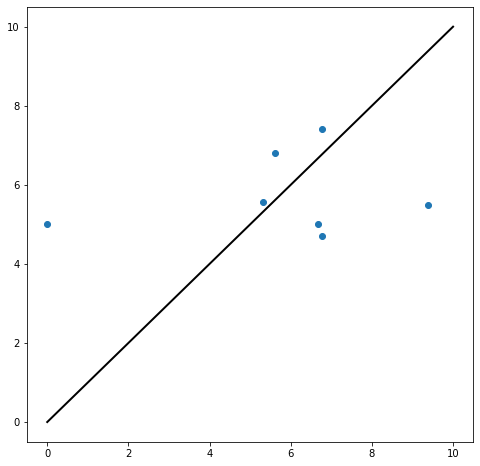

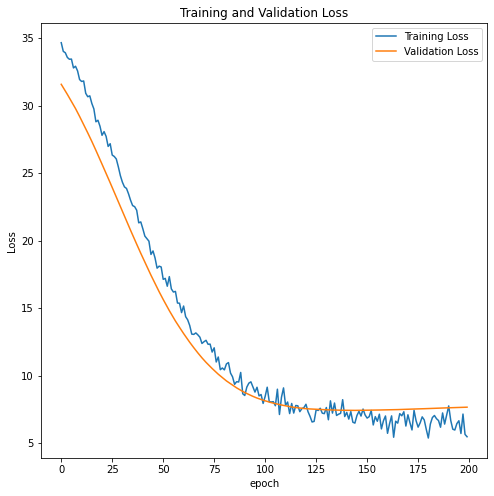

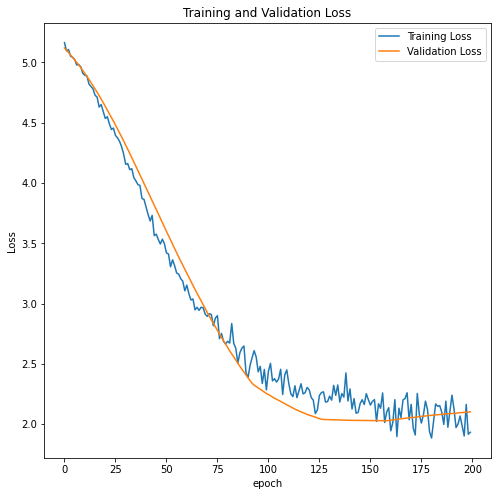

Overall spearman correlation: 0.186
------------------------------------------------------------------------
Training for fold 1, seed 2 ...
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 63ms/sample - loss: 35.2583 - mean_absolute_error: 5.3095 - val_loss: 30.0094 - val_mean_absolute_error: 4.7893
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.9102 - mean_absolute_error: 5.2762 - val_loss: 29.7695 - val_mean_absolute_error: 4.7642
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 35.1472 - mean_absolute_error: 5.2937 - val_loss: 29.5315 - val_mean_absolute_error: 4.7392
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.3143 - mean_absolute_error: 5.2402 - val_loss: 29.2826 - val_mean_absolute_error: 4.7129
Epoch 5/200
14/14 [==============================] - 0s 4ms/sample - loss: 34.4155 - mean_absolute_error: 5.2468 - val_loss: 29.0344 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.1508 - mean_absolute_error: 3.4716 - val_loss: 15.3980 - val_mean_absolute_error: 3.3110
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.3668 - mean_absolute_error: 3.5311 - val_loss: 15.1358 - val_mean_absolute_error: 3.2911
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.1642 - mean_absolute_error: 3.3778 - val_loss: 14.8773 - val_mean_absolute_error: 3.2712
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.8008 - mean_absolute_error: 3.3476 - val_loss: 14.6176 - val_mean_absolute_error: 3.2509
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.2247 - mean_absolute_error: 3.2698 - val_loss: 14.3712 - val_mean_absolute_error: 3.2312
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.8766 - mean_absolute_error: 3.2893 - val_loss: 14.1353 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.9019 - mean_absolute_error: 2.4550 - val_loss: 8.7474 - val_mean_absolute_error: 2.6066
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.9272 - mean_absolute_error: 2.2746 - val_loss: 8.7065 - val_mean_absolute_error: 2.6010
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.7923 - mean_absolute_error: 2.2438 - val_loss: 8.6737 - val_mean_absolute_error: 2.5964
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.1756 - mean_absolute_error: 2.2444 - val_loss: 8.6400 - val_mean_absolute_error: 2.5916
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.6775 - mean_absolute_error: 2.2112 - val_loss: 8.6085 - val_mean_absolute_error: 2.5868
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.7924 - mean_absolute_error: 2.1861 - val_loss: 8.5838 - val_mean_absolute_error: 2.5831


14/14 [==============================] - 0s 5ms/sample - loss: 5.4689 - mean_absolute_error: 1.8194 - val_loss: 8.1828 - val_mean_absolute_error: 2.4522
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.0360 - mean_absolute_error: 2.1581 - val_loss: 8.1837 - val_mean_absolute_error: 2.4505
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.8638 - mean_absolute_error: 2.0915 - val_loss: 8.1843 - val_mean_absolute_error: 2.4484
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.4845 - mean_absolute_error: 1.7699 - val_loss: 8.1866 - val_mean_absolute_error: 2.4463
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.9939 - mean_absolute_error: 1.9189 - val_loss: 8.1892 - val_mean_absolute_error: 2.4441
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.4479 - mean_absolute_error: 2.0336 - val_loss: 8.1922 - val_mean_absolute_error: 2.4425
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.8749 - mean_absolute_error: 1.9915 - val_loss: 8.2085 - val_mean_absolute_error: 2.4054
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.4525 - mean_absolute_error: 1.8688 - val_loss: 8.2090 - val_mean_absolute_error: 2.4054
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.6927 - mean_absolute_error: 1.9029 - val_loss: 8.2091 - val_mean_absolute_error: 2.4048
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.7270 - mean_absolute_error: 1.9122 - val_loss: 8.2103 - val_mean_absolute_error: 2.4044
Spearman correlation: -0.048


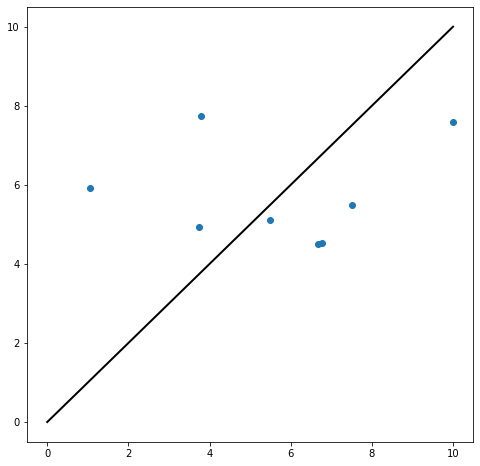

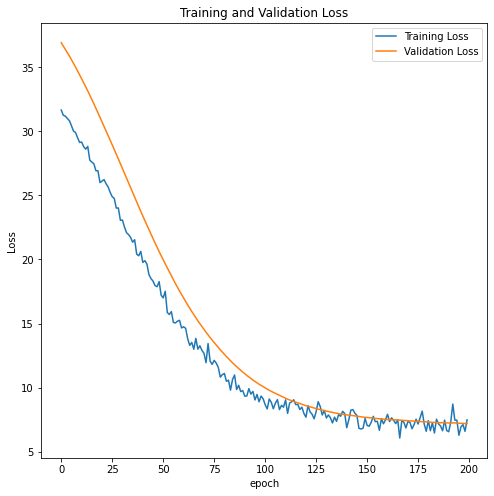

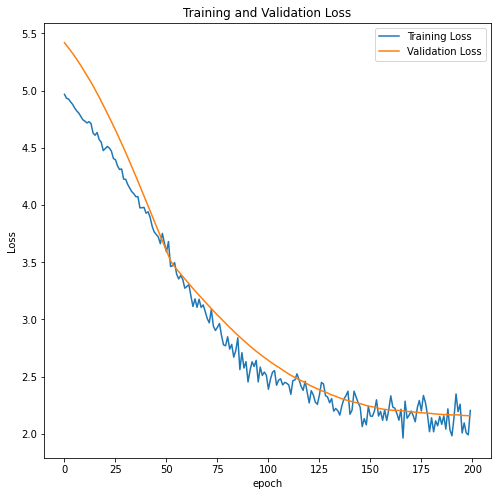

------------------------------------------------------------------------
Training for fold 2, seed 2 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 62ms/sample - loss: 35.1801 - mean_absolute_error: 5.2522 - val_loss: 30.4406 - val_mean_absolute_error: 4.9123
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.8690 - mean_absolute_error: 5.2139 - val_loss: 30.1996 - val_mean_absolute_error: 4.8886
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.7789 - mean_absolute_error: 5.2061 - val_loss: 29.9575 - val_mean_absolute_error: 4.8646
Epoch 4/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.3859 - mean_absolute_error: 5.1868 - val_loss: 29.7053 - val_mean_absolute_error: 4.8395
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.4322 - mean_absolute_error: 5.0941 - val_loss: 29.4338 - val_mean_absolute_error: 4.8124
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.5407 - mean_absolute_error: 3.7118 - val_loss: 15.1874 - val_mean_absolute_error: 3.0754
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.0765 - mean_absolute_error: 3.6764 - val_loss: 14.8959 - val_mean_absolute_error: 3.0393
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.2898 - mean_absolute_error: 3.7050 - val_loss: 14.6044 - val_mean_absolute_error: 3.0025
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.9657 - mean_absolute_error: 3.6860 - val_loss: 14.3206 - val_mean_absolute_error: 2.9662
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.2131 - mean_absolute_error: 3.6074 - val_loss: 14.0457 - val_mean_absolute_error: 2.9306
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.9161 - mean_absolute_error: 3.5655 - val_loss: 13.7689 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.1259 - mean_absolute_error: 2.5426 - val_loss: 7.0322 - val_mean_absolute_error: 2.0718
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.3451 - mean_absolute_error: 2.6160 - val_loss: 6.9670 - val_mean_absolute_error: 2.0590
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.3822 - mean_absolute_error: 2.6112 - val_loss: 6.9095 - val_mean_absolute_error: 2.0475
Epoch 101/200
15/15 [==============================] - 0s 4ms/sample - loss: 10.2705 - mean_absolute_error: 2.7342 - val_loss: 6.8527 - val_mean_absolute_error: 2.0359
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.8911 - mean_absolute_error: 2.6806 - val_loss: 6.7922 - val_mean_absolute_error: 2.0230
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.8416 - mean_absolute_error: 2.6415 - val_loss: 6.7426 - val_mean_absolute_error: 2.0122

15/15 [==============================] - 0s 5ms/sample - loss: 7.7988 - mean_absolute_error: 2.3694 - val_loss: 5.7873 - val_mean_absolute_error: 1.8340
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8726 - mean_absolute_error: 2.2689 - val_loss: 5.7804 - val_mean_absolute_error: 1.8353
Epoch 149/200
15/15 [==============================] - 0s 4ms/sample - loss: 9.3775 - mean_absolute_error: 2.5372 - val_loss: 5.7767 - val_mean_absolute_error: 1.8364
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2299 - mean_absolute_error: 2.1969 - val_loss: 5.7728 - val_mean_absolute_error: 1.8375
Epoch 151/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.6141 - mean_absolute_error: 2.4576 - val_loss: 5.7670 - val_mean_absolute_error: 1.8387
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.6780 - mean_absolute_error: 2.2688 - val_loss: 5.7634 - val_mean_absolute_error: 1.8392
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.9774 - mean_absolute_error: 2.0970 - val_loss: 5.6680 - val_mean_absolute_error: 1.8659
Epoch 198/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.9946 - mean_absolute_error: 2.1402 - val_loss: 5.6667 - val_mean_absolute_error: 1.8666
Epoch 199/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.7512 - mean_absolute_error: 2.3318 - val_loss: 5.6649 - val_mean_absolute_error: 1.8667
Epoch 200/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.9236 - mean_absolute_error: 2.1106 - val_loss: 5.6637 - val_mean_absolute_error: 1.8681
Spearman correlation: 0.286


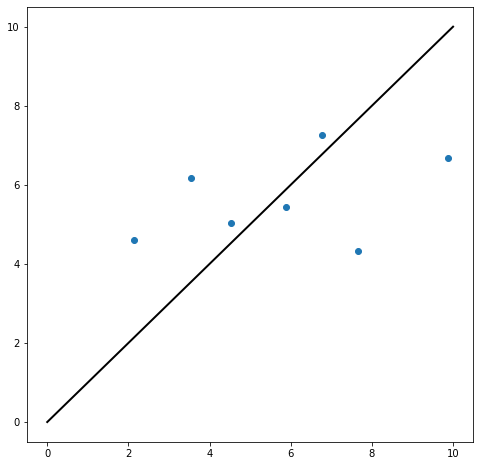

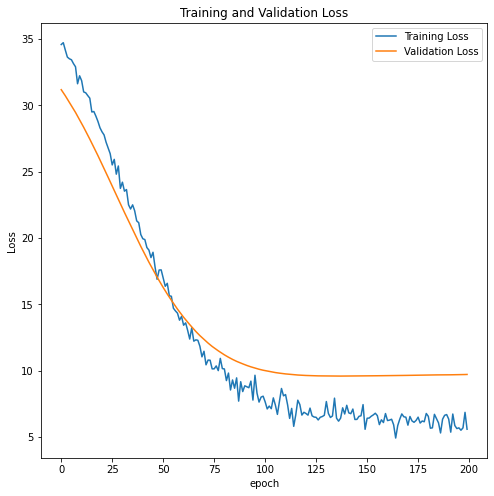

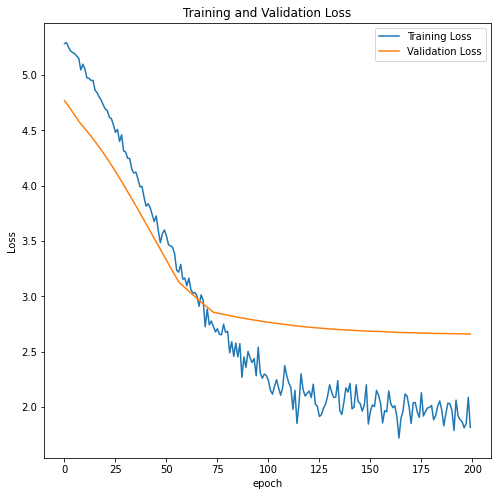

------------------------------------------------------------------------
Training for fold 3, seed 2 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 62ms/sample - loss: 30.2327 - mean_absolute_error: 4.8532 - val_loss: 40.3014 - val_mean_absolute_error: 5.7180
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 30.1607 - mean_absolute_error: 4.8502 - val_loss: 40.0344 - val_mean_absolute_error: 5.6999
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 29.6288 - mean_absolute_error: 4.8011 - val_loss: 39.7606 - val_mean_absolute_error: 5.6814
Epoch 4/200
15/15 [==============================] - 0s 4ms/sample - loss: 29.7204 - mean_absolute_error: 4.7906 - val_loss: 39.4847 - val_mean_absolute_error: 5.6626
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 29.2763 - mean_absolute_error: 4.7632 - val_loss: 39.1936 - val_mean_absolute_error: 5.6427
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 4ms/sample - loss: 17.2353 - mean_absolute_error: 3.4296 - val_loss: 23.3261 - val_mean_absolute_error: 4.3748
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.5555 - mean_absolute_error: 3.3673 - val_loss: 22.9815 - val_mean_absolute_error: 4.3415
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.5775 - mean_absolute_error: 3.3597 - val_loss: 22.6427 - val_mean_absolute_error: 4.3083
Epoch 52/200
15/15 [==============================] - 0s 4ms/sample - loss: 16.2490 - mean_absolute_error: 3.3422 - val_loss: 22.3029 - val_mean_absolute_error: 4.2747
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.4561 - mean_absolute_error: 3.2015 - val_loss: 21.9716 - val_mean_absolute_error: 4.2416
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.0431 - mean_absolute_error: 3.2209 - val_loss: 21.6325 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.1123 - mean_absolute_error: 2.2798 - val_loss: 12.1583 - val_mean_absolute_error: 2.9668
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5957 - mean_absolute_error: 2.4074 - val_loss: 12.0565 - val_mean_absolute_error: 2.9477
Epoch 100/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.5806 - mean_absolute_error: 2.3002 - val_loss: 11.9472 - val_mean_absolute_error: 2.9270
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7847 - mean_absolute_error: 2.2950 - val_loss: 11.8453 - val_mean_absolute_error: 2.9073
Epoch 102/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.9150 - mean_absolute_error: 2.3235 - val_loss: 11.7439 - val_mean_absolute_error: 2.8875
Epoch 103/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.6933 - mean_absolute_error: 2.5048 - val_loss: 11.6574 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4798 - mean_absolute_error: 1.9886 - val_loss: 9.5154 - val_mean_absolute_error: 2.4945
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3435 - mean_absolute_error: 2.0077 - val_loss: 9.4961 - val_mean_absolute_error: 2.4901
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.8101 - mean_absolute_error: 1.8921 - val_loss: 9.4772 - val_mean_absolute_error: 2.4857
Epoch 150/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.3428 - mean_absolute_error: 2.0587 - val_loss: 9.4512 - val_mean_absolute_error: 2.4798
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4829 - mean_absolute_error: 2.0232 - val_loss: 9.4440 - val_mean_absolute_error: 2.4773
Epoch 152/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.8286 - mean_absolute_error: 1.9334 - val_loss: 9.4273 - val_mean_absolute_error: 2.473

15/15 [==============================] - 0s 5ms/sample - loss: 5.2224 - mean_absolute_error: 1.8228 - val_loss: 9.1457 - val_mean_absolute_error: 2.4230
Epoch 197/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.4742 - mean_absolute_error: 1.8333 - val_loss: 9.1394 - val_mean_absolute_error: 2.4226
Epoch 198/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.4545 - mean_absolute_error: 2.0376 - val_loss: 9.1295 - val_mean_absolute_error: 2.4220
Epoch 199/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.9450 - mean_absolute_error: 1.9221 - val_loss: 9.1259 - val_mean_absolute_error: 2.4218
Epoch 200/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.3458 - mean_absolute_error: 1.8164 - val_loss: 9.1204 - val_mean_absolute_error: 2.4214
Spearman correlation: 0.429


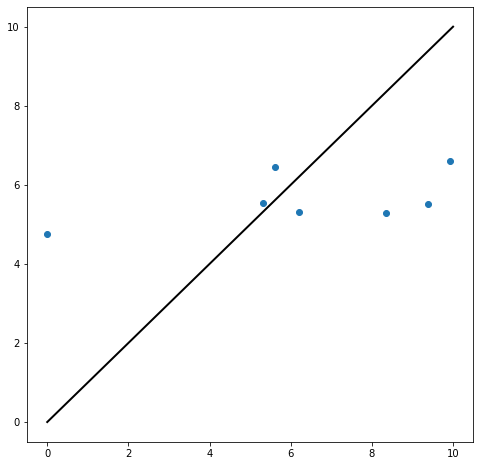

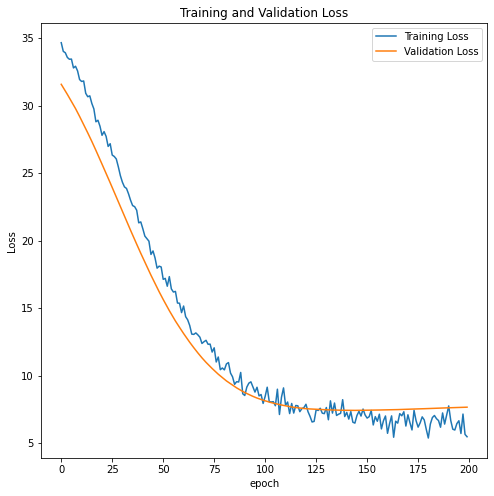

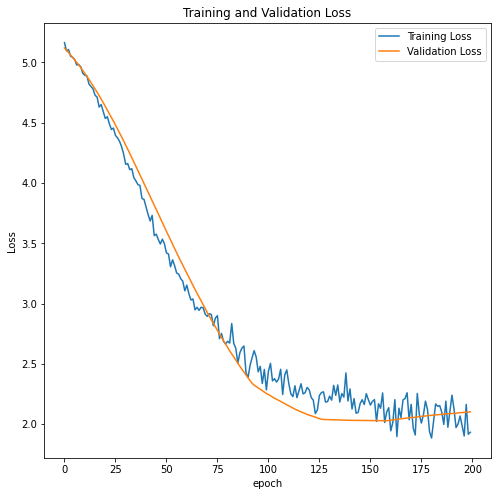

Overall spearman correlation: 0.241
------------------------------------------------------------------------
Training for fold 1, seed 3 ...
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 68ms/sample - loss: 32.3680 - mean_absolute_error: 5.0151 - val_loss: 36.0623 - val_mean_absolute_error: 5.3610
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.9642 - mean_absolute_error: 4.9718 - val_loss: 35.8087 - val_mean_absolute_error: 5.3426
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.3975 - mean_absolute_error: 4.9381 - val_loss: 35.5460 - val_mean_absolute_error: 5.3234
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 30.9195 - mean_absolute_error: 4.8877 - val_loss: 35.2797 - val_mean_absolute_error: 5.3039
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.2475 - mean_absolute_error: 4.8964 - val_loss: 35.0065 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.5849 - mean_absolute_error: 3.4558 - val_loss: 20.0137 - val_mean_absolute_error: 3.9753
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.2591 - mean_absolute_error: 3.4839 - val_loss: 19.6778 - val_mean_absolute_error: 3.9391
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.9384 - mean_absolute_error: 3.5153 - val_loss: 19.3643 - val_mean_absolute_error: 3.9048
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.7456 - mean_absolute_error: 3.3872 - val_loss: 19.0525 - val_mean_absolute_error: 3.8703
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.5756 - mean_absolute_error: 3.3867 - val_loss: 18.7391 - val_mean_absolute_error: 3.8351
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.9936 - mean_absolute_error: 3.3609 - val_loss: 18.4332 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.6503 - mean_absolute_error: 2.4815 - val_loss: 10.2226 - val_mean_absolute_error: 2.5786
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.3067 - mean_absolute_error: 2.3837 - val_loss: 10.1239 - val_mean_absolute_error: 2.5627
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.7906 - mean_absolute_error: 2.4638 - val_loss: 10.0439 - val_mean_absolute_error: 2.5496
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.5632 - mean_absolute_error: 2.5976 - val_loss: 9.9752 - val_mean_absolute_error: 2.5382
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.8857 - mean_absolute_error: 2.5309 - val_loss: 9.8903 - val_mean_absolute_error: 2.5238
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.8777 - mean_absolute_error: 2.3485 - val_loss: 9.8096 - val_mean_absolute_error: 2.50

14/14 [==============================] - 0s 5ms/sample - loss: 6.2831 - mean_absolute_error: 1.9854 - val_loss: 8.4318 - val_mean_absolute_error: 2.2076
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9677 - mean_absolute_error: 2.1011 - val_loss: 8.4245 - val_mean_absolute_error: 2.2059
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.0681 - mean_absolute_error: 2.1008 - val_loss: 8.4231 - val_mean_absolute_error: 2.2051
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.5178 - mean_absolute_error: 1.9341 - val_loss: 8.4121 - val_mean_absolute_error: 2.2029
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.1649 - mean_absolute_error: 2.0068 - val_loss: 8.4019 - val_mean_absolute_error: 2.2010
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9613 - mean_absolute_error: 2.1261 - val_loss: 8.3893 - val_mean_absolute_error: 2.1984
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.3875 - mean_absolute_error: 1.9078 - val_loss: 8.4744 - val_mean_absolute_error: 2.1801
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.1882 - mean_absolute_error: 2.1169 - val_loss: 8.4855 - val_mean_absolute_error: 2.1809
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.0332 - mean_absolute_error: 1.9244 - val_loss: 8.4901 - val_mean_absolute_error: 2.1809
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.6005 - mean_absolute_error: 1.9814 - val_loss: 8.4973 - val_mean_absolute_error: 2.1814
Spearman correlation: 0.571


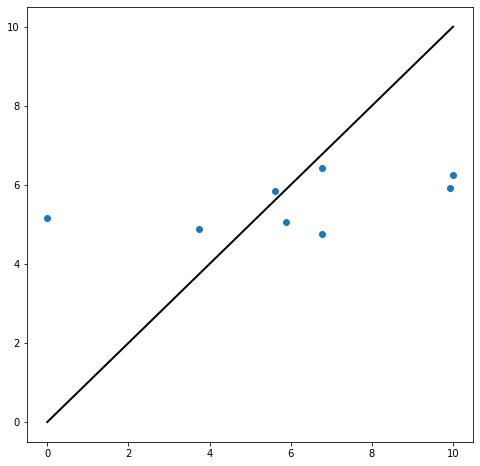

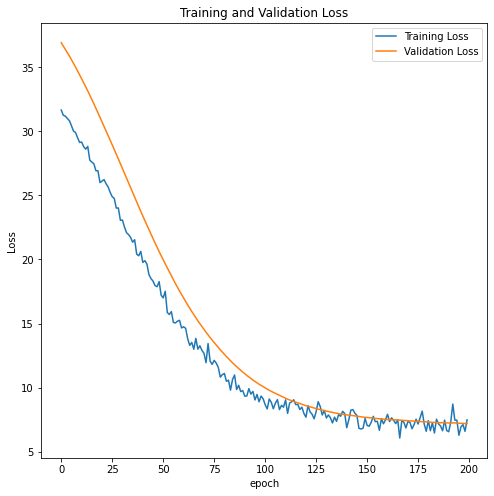

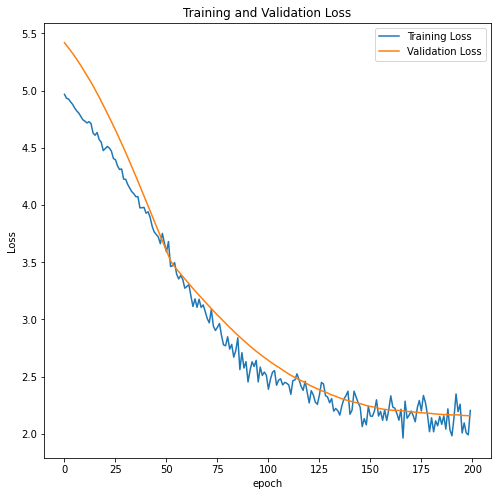

------------------------------------------------------------------------
Training for fold 2, seed 3 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 65ms/sample - loss: 35.5937 - mean_absolute_error: 5.3029 - val_loss: 29.6358 - val_mean_absolute_error: 4.7656
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.6365 - mean_absolute_error: 5.2544 - val_loss: 29.3997 - val_mean_absolute_error: 4.7398
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.6719 - mean_absolute_error: 5.2395 - val_loss: 29.1701 - val_mean_absolute_error: 4.7146
Epoch 4/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.7315 - mean_absolute_error: 5.2427 - val_loss: 28.9376 - val_mean_absolute_error: 4.6890
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.1233 - mean_absolute_error: 5.2026 - val_loss: 28.6854 - val_mean_absolute_error: 4.6610
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6738 - mean_absolute_error: 3.6658 - val_loss: 15.3638 - val_mean_absolute_error: 2.8705
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6290 - mean_absolute_error: 3.6499 - val_loss: 15.1053 - val_mean_absolute_error: 2.8395
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.5442 - mean_absolute_error: 3.6337 - val_loss: 14.8575 - val_mean_absolute_error: 2.8091
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.0372 - mean_absolute_error: 3.5625 - val_loss: 14.6218 - val_mean_absolute_error: 2.7837
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.3271 - mean_absolute_error: 3.6003 - val_loss: 14.3888 - val_mean_absolute_error: 2.7641
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.8091 - mean_absolute_error: 3.5668 - val_loss: 14.1614 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7805 - mean_absolute_error: 2.2329 - val_loss: 9.1159 - val_mean_absolute_error: 2.5787
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3974 - mean_absolute_error: 2.1910 - val_loss: 9.0858 - val_mean_absolute_error: 2.5763
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.6525 - mean_absolute_error: 2.2512 - val_loss: 9.0565 - val_mean_absolute_error: 2.5737
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7776 - mean_absolute_error: 2.2737 - val_loss: 9.0246 - val_mean_absolute_error: 2.5708
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.6831 - mean_absolute_error: 2.2080 - val_loss: 8.9984 - val_mean_absolute_error: 2.5683
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.6951 - mean_absolute_error: 2.2502 - val_loss: 8.9723 - val_mean_absolute_error: 2.5658


15/15 [==============================] - 0s 5ms/sample - loss: 6.2328 - mean_absolute_error: 1.9846 - val_loss: 8.7363 - val_mean_absolute_error: 2.5343
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4776 - mean_absolute_error: 2.0526 - val_loss: 8.7404 - val_mean_absolute_error: 2.5363
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5090 - mean_absolute_error: 2.0032 - val_loss: 8.7438 - val_mean_absolute_error: 2.5377
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.1551 - mean_absolute_error: 1.9252 - val_loss: 8.7438 - val_mean_absolute_error: 2.5381
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7800 - mean_absolute_error: 1.9834 - val_loss: 8.7482 - val_mean_absolute_error: 2.5393
Epoch 152/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.6143 - mean_absolute_error: 2.0578 - val_loss: 8.7489 - val_mean_absolute_error: 2.5402
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.6637 - mean_absolute_error: 1.8062 - val_loss: 8.8379 - val_mean_absolute_error: 2.5615
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2435 - mean_absolute_error: 1.9376 - val_loss: 8.8397 - val_mean_absolute_error: 2.5615
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4992 - mean_absolute_error: 1.8836 - val_loss: 8.8459 - val_mean_absolute_error: 2.5622
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7287 - mean_absolute_error: 1.8561 - val_loss: 8.8470 - val_mean_absolute_error: 2.5622
Spearman correlation: 0.000


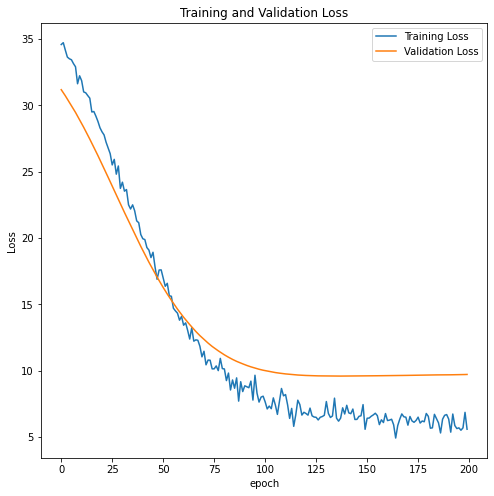

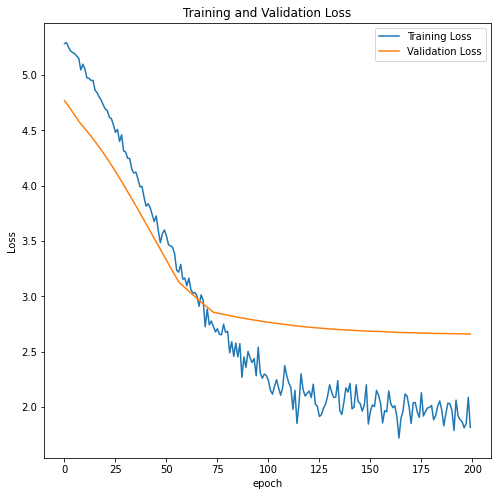

------------------------------------------------------------------------
Training for fold 3, seed 3 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 68ms/sample - loss: 33.4096 - mean_absolute_error: 5.1146 - val_loss: 34.0025 - val_mean_absolute_error: 5.1718
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.8018 - mean_absolute_error: 5.0698 - val_loss: 33.7509 - val_mean_absolute_error: 5.1476
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.7644 - mean_absolute_error: 5.0539 - val_loss: 33.4944 - val_mean_absolute_error: 5.1227
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.5989 - mean_absolute_error: 5.0367 - val_loss: 33.2387 - val_mean_absolute_error: 5.1022
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.4592 - mean_absolute_error: 5.0325 - val_loss: 32.9800 - val_mean_absolute_error: 5.0857
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.3396 - mean_absolute_error: 3.3945 - val_loss: 18.4495 - val_mean_absolute_error: 3.9339
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.4936 - mean_absolute_error: 3.4734 - val_loss: 18.1460 - val_mean_absolute_error: 3.9024
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.0472 - mean_absolute_error: 3.3451 - val_loss: 17.8557 - val_mean_absolute_error: 3.8718
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.9657 - mean_absolute_error: 3.3398 - val_loss: 17.5684 - val_mean_absolute_error: 3.8410
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.0568 - mean_absolute_error: 3.2579 - val_loss: 17.2828 - val_mean_absolute_error: 3.8100
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.5835 - mean_absolute_error: 3.3195 - val_loss: 17.0079 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.6490 - mean_absolute_error: 2.5378 - val_loss: 9.9345 - val_mean_absolute_error: 2.6829
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2678 - mean_absolute_error: 2.3641 - val_loss: 9.8616 - val_mean_absolute_error: 2.6644
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.6985 - mean_absolute_error: 2.4663 - val_loss: 9.7953 - val_mean_absolute_error: 2.6472
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5255 - mean_absolute_error: 2.4773 - val_loss: 9.7272 - val_mean_absolute_error: 2.6293
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.0338 - mean_absolute_error: 2.5599 - val_loss: 9.6643 - val_mean_absolute_error: 2.6125
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.1673 - mean_absolute_error: 2.3578 - val_loss: 9.6020 - val_mean_absolute_error: 2.5954


15/15 [==============================] - 0s 5ms/sample - loss: 6.7463 - mean_absolute_error: 2.1384 - val_loss: 8.3914 - val_mean_absolute_error: 2.2949
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.1449 - mean_absolute_error: 2.2606 - val_loss: 8.3841 - val_mean_absolute_error: 2.2927
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8225 - mean_absolute_error: 2.1874 - val_loss: 8.3733 - val_mean_absolute_error: 2.2885
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0859 - mean_absolute_error: 2.1349 - val_loss: 8.3615 - val_mean_absolute_error: 2.2843
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7656 - mean_absolute_error: 2.1560 - val_loss: 8.3510 - val_mean_absolute_error: 2.2802
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5010 - mean_absolute_error: 2.1321 - val_loss: 8.3405 - val_mean_absolute_error: 2.2762
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3156 - mean_absolute_error: 1.9986 - val_loss: 8.1030 - val_mean_absolute_error: 2.1687
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0236 - mean_absolute_error: 2.2844 - val_loss: 8.0994 - val_mean_absolute_error: 2.1675
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9824 - mean_absolute_error: 2.1352 - val_loss: 8.0960 - val_mean_absolute_error: 2.1652
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7907 - mean_absolute_error: 2.0806 - val_loss: 8.0942 - val_mean_absolute_error: 2.1651
Spearman correlation: -0.036


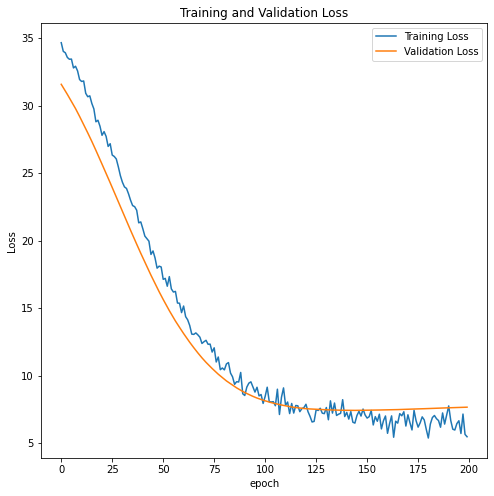

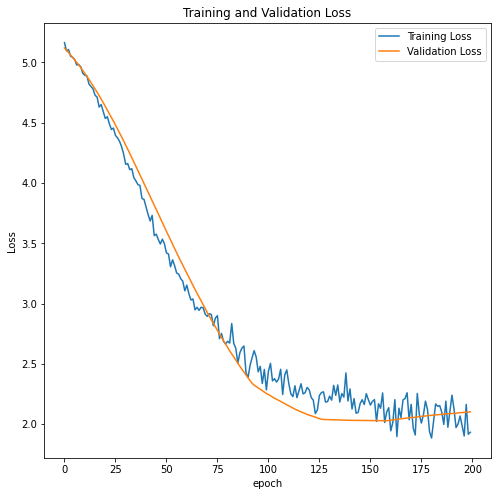

Overall spearman correlation: 0.115
------------------------------------------------------------------------
Training for fold 1, seed 4 ...
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 70ms/sample - loss: 32.3743 - mean_absolute_error: 5.1348 - val_loss: 35.2912 - val_mean_absolute_error: 5.0847
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 32.4731 - mean_absolute_error: 5.1424 - val_loss: 35.0463 - val_mean_absolute_error: 5.0614
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.9257 - mean_absolute_error: 5.0880 - val_loss: 34.7931 - val_mean_absolute_error: 5.0371
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.6911 - mean_absolute_error: 5.0719 - val_loss: 34.5368 - val_mean_absolute_error: 5.0125
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 31.6391 - mean_absolute_error: 5.0762 - val_loss: 34.2750 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.5623 - mean_absolute_error: 3.4649 - val_loss: 19.7885 - val_mean_absolute_error: 3.7990
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.7894 - mean_absolute_error: 3.4561 - val_loss: 19.4913 - val_mean_absolute_error: 3.7761
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.8031 - mean_absolute_error: 3.4827 - val_loss: 19.2014 - val_mean_absolute_error: 3.7534
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.9030 - mean_absolute_error: 3.3863 - val_loss: 18.9077 - val_mean_absolute_error: 3.7301
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.7232 - mean_absolute_error: 3.3376 - val_loss: 18.6260 - val_mean_absolute_error: 3.7073
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.0899 - mean_absolute_error: 3.3261 - val_loss: 18.3455 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.0972 - mean_absolute_error: 2.2665 - val_loss: 11.2945 - val_mean_absolute_error: 2.8549
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.6475 - mean_absolute_error: 2.2597 - val_loss: 11.2298 - val_mean_absolute_error: 2.8416
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.9912 - mean_absolute_error: 2.2128 - val_loss: 11.1649 - val_mean_absolute_error: 2.8280
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.2908 - mean_absolute_error: 2.1904 - val_loss: 11.1040 - val_mean_absolute_error: 2.8149
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.4626 - mean_absolute_error: 2.1980 - val_loss: 11.0420 - val_mean_absolute_error: 2.8011
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.4043 - mean_absolute_error: 2.2007 - val_loss: 10.9866 - val_mean_absolute_error: 2

Epoch 147/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.0273 - mean_absolute_error: 1.8983 - val_loss: 9.9555 - val_mean_absolute_error: 2.5974
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.9528 - mean_absolute_error: 1.9523 - val_loss: 9.9498 - val_mean_absolute_error: 2.5954
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.3972 - mean_absolute_error: 2.0210 - val_loss: 9.9461 - val_mean_absolute_error: 2.5937
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.5300 - mean_absolute_error: 2.1002 - val_loss: 9.9413 - val_mean_absolute_error: 2.5916
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.4329 - mean_absolute_error: 2.1057 - val_loss: 9.9400 - val_mean_absolute_error: 2.5909
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.3299 - mean_absolute_error: 1.9335 - val_loss: 9.9337 - val_mean_absolute_error: 2.588

14/14 [==============================] - 0s 5ms/sample - loss: 5.7540 - mean_absolute_error: 1.9191 - val_loss: 9.8301 - val_mean_absolute_error: 2.5233
Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.2273 - mean_absolute_error: 1.9311 - val_loss: 9.8270 - val_mean_absolute_error: 2.5215
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.2209 - mean_absolute_error: 2.0336 - val_loss: 9.8254 - val_mean_absolute_error: 2.5213
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.3823 - mean_absolute_error: 2.1013 - val_loss: 9.8246 - val_mean_absolute_error: 2.5213
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.2635 - mean_absolute_error: 1.8885 - val_loss: 9.8229 - val_mean_absolute_error: 2.5211
Spearman correlation: 0.190


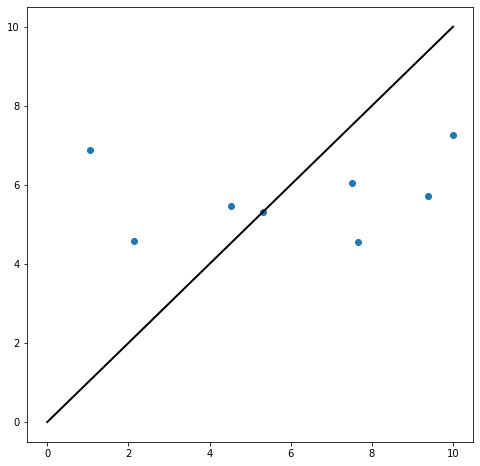

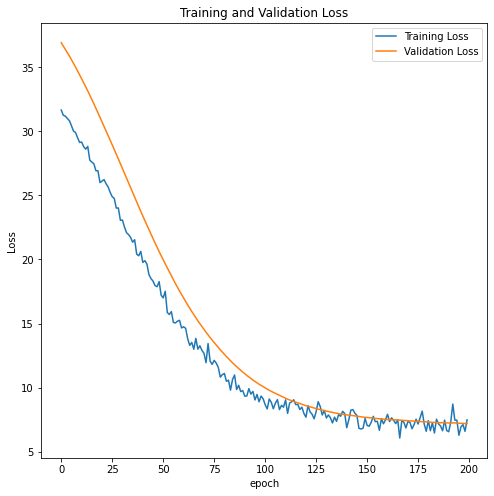

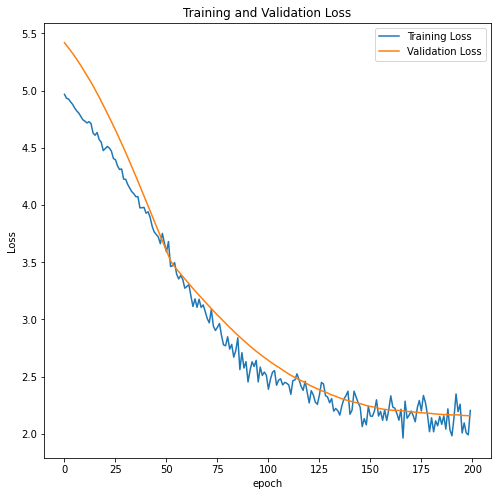

------------------------------------------------------------------------
Training for fold 2, seed 4 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 66ms/sample - loss: 34.6146 - mean_absolute_error: 5.1124 - val_loss: 31.5366 - val_mean_absolute_error: 5.1658
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.2690 - mean_absolute_error: 5.0828 - val_loss: 31.2978 - val_mean_absolute_error: 5.1419
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.7642 - mean_absolute_error: 5.0398 - val_loss: 31.0423 - val_mean_absolute_error: 5.1162
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.5272 - mean_absolute_error: 5.0323 - val_loss: 30.7897 - val_mean_absolute_error: 5.0907
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.0443 - mean_absolute_error: 4.9806 - val_loss: 30.5226 - val_mean_absolute_error: 5.0636
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.6764 - mean_absolute_error: 3.5852 - val_loss: 16.1404 - val_mean_absolute_error: 3.2837
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.5361 - mean_absolute_error: 3.5630 - val_loss: 15.8486 - val_mean_absolute_error: 3.2454
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.3623 - mean_absolute_error: 3.6017 - val_loss: 15.5650 - val_mean_absolute_error: 3.2160
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.3577 - mean_absolute_error: 3.6014 - val_loss: 15.2861 - val_mean_absolute_error: 3.1868
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.0832 - mean_absolute_error: 3.4679 - val_loss: 15.0059 - val_mean_absolute_error: 3.1569
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.9820 - mean_absolute_error: 3.4216 - val_loss: 14.7376 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.5125 - mean_absolute_error: 2.5706 - val_loss: 7.9867 - val_mean_absolute_error: 2.3310
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.8018 - mean_absolute_error: 2.4939 - val_loss: 7.9153 - val_mean_absolute_error: 2.3205
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.5593 - mean_absolute_error: 2.5943 - val_loss: 7.8616 - val_mean_absolute_error: 2.3124
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.3255 - mean_absolute_error: 2.5087 - val_loss: 7.8083 - val_mean_absolute_error: 2.3042
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.8539 - mean_absolute_error: 2.4544 - val_loss: 7.7525 - val_mean_absolute_error: 2.2955
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.4155 - mean_absolute_error: 2.5682 - val_loss: 7.6977 - val_mean_absolute_error: 2.2866


15/15 [==============================] - 0s 5ms/sample - loss: 8.1435 - mean_absolute_error: 2.2947 - val_loss: 6.6534 - val_mean_absolute_error: 2.0503
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.4695 - mean_absolute_error: 2.2884 - val_loss: 6.6433 - val_mean_absolute_error: 2.0465
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0982 - mean_absolute_error: 2.2167 - val_loss: 6.6377 - val_mean_absolute_error: 2.0442
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8601 - mean_absolute_error: 2.3462 - val_loss: 6.6345 - val_mean_absolute_error: 2.0428
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9171 - mean_absolute_error: 2.3730 - val_loss: 6.6272 - val_mean_absolute_error: 2.0397
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3215 - mean_absolute_error: 2.2341 - val_loss: 6.6202 - val_mean_absolute_error: 2.0367
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.4470 - mean_absolute_error: 2.2733 - val_loss: 6.5104 - val_mean_absolute_error: 2.0455
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9713 - mean_absolute_error: 2.1373 - val_loss: 6.5091 - val_mean_absolute_error: 2.0456
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5783 - mean_absolute_error: 2.2124 - val_loss: 6.5106 - val_mean_absolute_error: 2.0464
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5364 - mean_absolute_error: 2.1048 - val_loss: 6.5092 - val_mean_absolute_error: 2.0465
Spearman correlation: -0.036


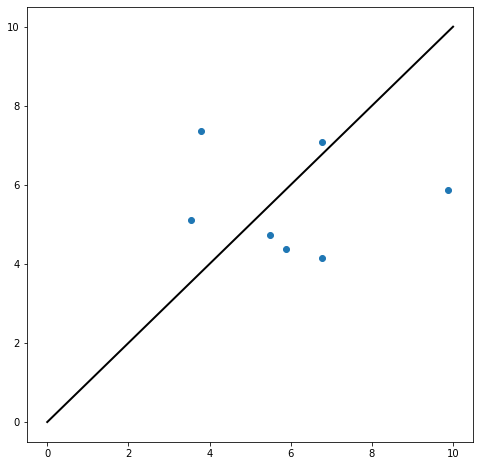

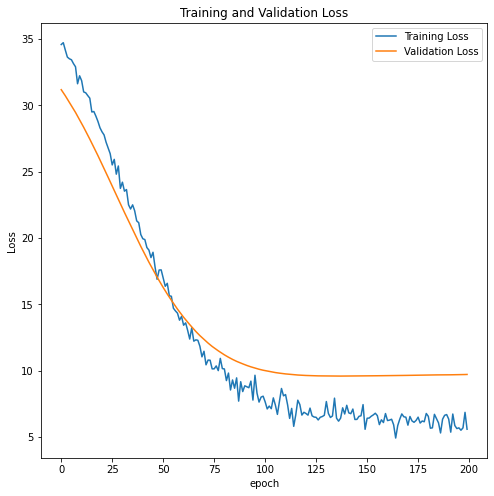

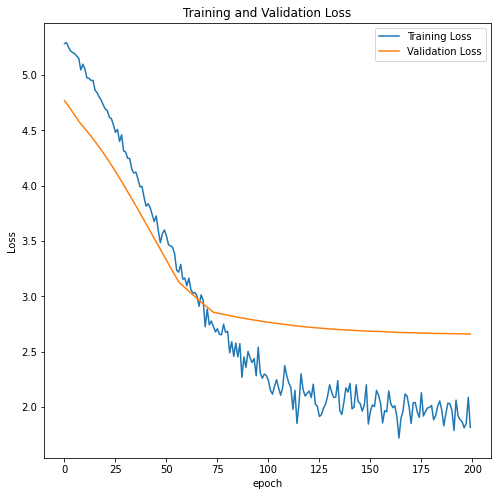

------------------------------------------------------------------------
Training for fold 3, seed 4 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 67ms/sample - loss: 33.3183 - mean_absolute_error: 5.1276 - val_loss: 33.1520 - val_mean_absolute_error: 5.0943
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.6994 - mean_absolute_error: 5.1353 - val_loss: 32.9096 - val_mean_absolute_error: 5.0757
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.2610 - mean_absolute_error: 5.0970 - val_loss: 32.6545 - val_mean_absolute_error: 5.0561
Epoch 4/200
15/15 [==============================] - 0s 4ms/sample - loss: 32.9405 - mean_absolute_error: 5.0845 - val_loss: 32.3957 - val_mean_absolute_error: 5.0361
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.5973 - mean_absolute_error: 5.0411 - val_loss: 32.1246 - val_mean_absolute_error: 5.0150
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.8916 - mean_absolute_error: 3.5152 - val_loss: 17.4596 - val_mean_absolute_error: 3.6310
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.5863 - mean_absolute_error: 3.5143 - val_loss: 17.1525 - val_mean_absolute_error: 3.5939
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.3507 - mean_absolute_error: 3.4420 - val_loss: 16.8552 - val_mean_absolute_error: 3.5574
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.6752 - mean_absolute_error: 3.5418 - val_loss: 16.5638 - val_mean_absolute_error: 3.5211
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.4621 - mean_absolute_error: 3.3647 - val_loss: 16.2763 - val_mean_absolute_error: 3.4848
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6929 - mean_absolute_error: 3.4069 - val_loss: 15.9936 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.8618 - mean_absolute_error: 2.4278 - val_loss: 8.8694 - val_mean_absolute_error: 2.4588
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.3249 - mean_absolute_error: 2.4774 - val_loss: 8.8037 - val_mean_absolute_error: 2.4542
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.0539 - mean_absolute_error: 2.4483 - val_loss: 8.7487 - val_mean_absolute_error: 2.4503
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.8070 - mean_absolute_error: 2.4887 - val_loss: 8.6917 - val_mean_absolute_error: 2.4461
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.9696 - mean_absolute_error: 2.4361 - val_loss: 8.6340 - val_mean_absolute_error: 2.4419
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5504 - mean_absolute_error: 2.4500 - val_loss: 8.5823 - val_mean_absolute_error: 2.4379


15/15 [==============================] - 0s 5ms/sample - loss: 6.5859 - mean_absolute_error: 1.9858 - val_loss: 7.6584 - val_mean_absolute_error: 2.3169
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.1619 - mean_absolute_error: 2.1244 - val_loss: 7.6554 - val_mean_absolute_error: 2.3153
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4732 - mean_absolute_error: 2.0162 - val_loss: 7.6502 - val_mean_absolute_error: 2.3133
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5123 - mean_absolute_error: 1.7906 - val_loss: 7.6447 - val_mean_absolute_error: 2.3113
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3253 - mean_absolute_error: 2.0829 - val_loss: 7.6429 - val_mean_absolute_error: 2.3099
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0008 - mean_absolute_error: 2.0654 - val_loss: 7.6388 - val_mean_absolute_error: 2.3082
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.8584 - mean_absolute_error: 1.8682 - val_loss: 7.6453 - val_mean_absolute_error: 2.2677
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6263 - mean_absolute_error: 2.0197 - val_loss: 7.6465 - val_mean_absolute_error: 2.2670
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7466 - mean_absolute_error: 2.0132 - val_loss: 7.6474 - val_mean_absolute_error: 2.2665
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.0494 - mean_absolute_error: 1.9065 - val_loss: 7.6482 - val_mean_absolute_error: 2.2660
Spearman correlation: 0.429


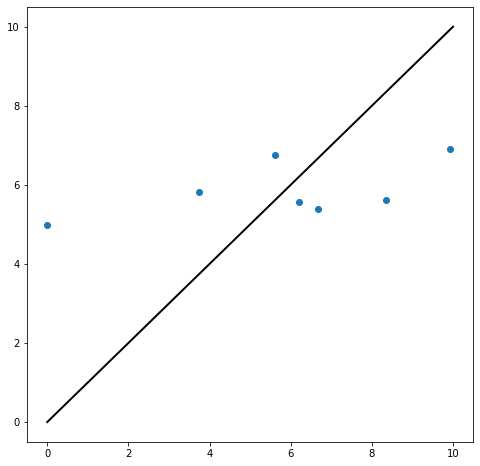

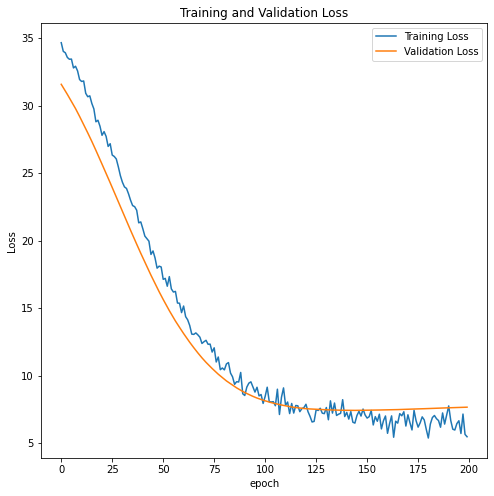

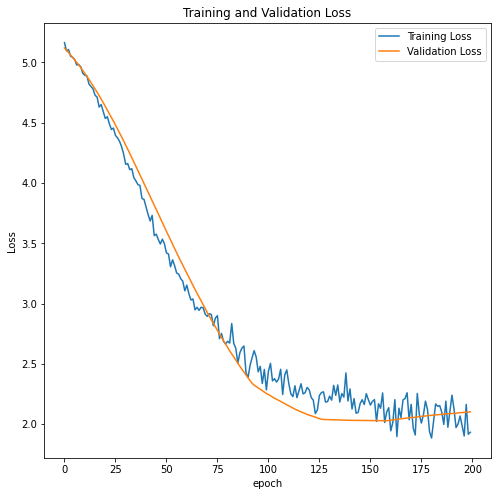

Overall spearman correlation: 0.270
------------------------------------------------------------------------
Training for fold 1, seed 5 ...
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 73ms/sample - loss: 36.0391 - mean_absolute_error: 5.4385 - val_loss: 29.7383 - val_mean_absolute_error: 4.6408
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 35.3286 - mean_absolute_error: 5.3812 - val_loss: 29.5198 - val_mean_absolute_error: 4.6163
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 35.0353 - mean_absolute_error: 5.3561 - val_loss: 29.2908 - val_mean_absolute_error: 4.5905
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.4243 - mean_absolute_error: 5.3231 - val_loss: 29.0505 - val_mean_absolute_error: 4.5633
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.8467 - mean_absolute_error: 5.3373 - val_loss: 28.8205 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.3303 - mean_absolute_error: 3.4952 - val_loss: 15.8333 - val_mean_absolute_error: 3.1534
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.4563 - mean_absolute_error: 3.5281 - val_loss: 15.5885 - val_mean_absolute_error: 3.1326
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.3409 - mean_absolute_error: 3.4823 - val_loss: 15.3467 - val_mean_absolute_error: 3.1116
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.6287 - mean_absolute_error: 3.4736 - val_loss: 15.1141 - val_mean_absolute_error: 3.0910
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.2432 - mean_absolute_error: 3.4146 - val_loss: 14.8902 - val_mean_absolute_error: 3.0707
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 14.6893 - mean_absolute_error: 3.2825 - val_loss: 14.6733 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.4953 - mean_absolute_error: 1.9934 - val_loss: 10.4133 - val_mean_absolute_error: 2.8882
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.2933 - mean_absolute_error: 2.0175 - val_loss: 10.4009 - val_mean_absolute_error: 2.8903
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.6569 - mean_absolute_error: 1.9544 - val_loss: 10.3869 - val_mean_absolute_error: 2.8925
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.5753 - mean_absolute_error: 2.0040 - val_loss: 10.3773 - val_mean_absolute_error: 2.8952
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.8929 - mean_absolute_error: 2.0062 - val_loss: 10.3654 - val_mean_absolute_error: 2.8972
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.4122 - mean_absolute_error: 1.9989 - val_loss: 10.3586 - val_mean_absolute_error: 2

Epoch 147/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.6730 - mean_absolute_error: 1.6419 - val_loss: 10.6620 - val_mean_absolute_error: 2.9636
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.9205 - mean_absolute_error: 1.7063 - val_loss: 10.6746 - val_mean_absolute_error: 2.9648
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.3921 - mean_absolute_error: 1.5358 - val_loss: 10.6894 - val_mean_absolute_error: 2.9662
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.1154 - mean_absolute_error: 1.6902 - val_loss: 10.6988 - val_mean_absolute_error: 2.9671
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.6650 - mean_absolute_error: 1.6291 - val_loss: 10.7130 - val_mean_absolute_error: 2.9685
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.1222 - mean_absolute_error: 1.7840 - val_loss: 10.7231 - val_mean_absolute_error:

Epoch 196/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.8142 - mean_absolute_error: 1.6728 - val_loss: 11.0681 - val_mean_absolute_error: 2.9999
Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.8464 - mean_absolute_error: 1.6598 - val_loss: 11.0811 - val_mean_absolute_error: 3.0009
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.1314 - mean_absolute_error: 1.8106 - val_loss: 11.0773 - val_mean_absolute_error: 3.0008
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.5855 - mean_absolute_error: 1.6106 - val_loss: 11.0852 - val_mean_absolute_error: 3.0015
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 4.2989 - mean_absolute_error: 1.5512 - val_loss: 11.0866 - val_mean_absolute_error: 3.0018
Spearman correlation: -0.190


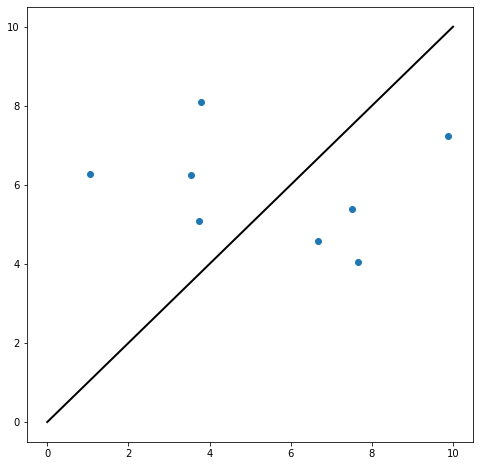

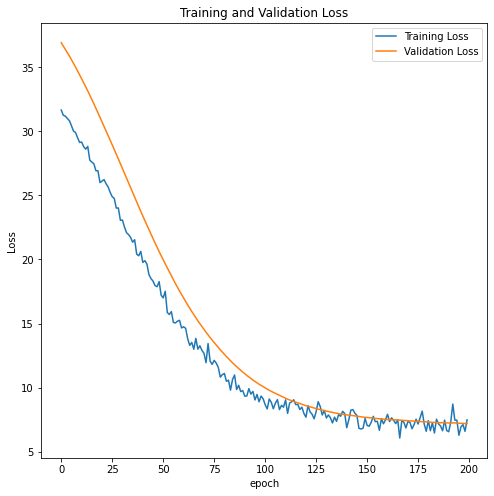

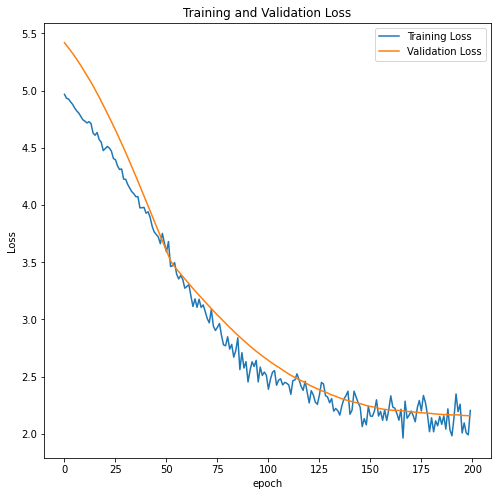

------------------------------------------------------------------------
Training for fold 2, seed 5 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 69ms/sample - loss: 32.6180 - mean_absolute_error: 5.0561 - val_loss: 35.6723 - val_mean_absolute_error: 5.2983
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 32.0713 - mean_absolute_error: 5.0133 - val_loss: 35.4106 - val_mean_absolute_error: 5.2803
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 32.1593 - mean_absolute_error: 5.0210 - val_loss: 35.1458 - val_mean_absolute_error: 5.2619
Epoch 4/200
15/15 [==============================] - 0s 4ms/sample - loss: 31.8518 - mean_absolute_error: 4.9835 - val_loss: 34.8756 - val_mean_absolute_error: 5.2431
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 31.6303 - mean_absolute_error: 4.9666 - val_loss: 34.6045 - val_mean_absolute_error: 5.2241
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.5856 - mean_absolute_error: 3.6019 - val_loss: 19.3981 - val_mean_absolute_error: 3.9481
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.8518 - mean_absolute_error: 3.4775 - val_loss: 19.0814 - val_mean_absolute_error: 3.9149
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.4528 - mean_absolute_error: 3.4376 - val_loss: 18.7599 - val_mean_absolute_error: 3.8807
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.7460 - mean_absolute_error: 3.5305 - val_loss: 18.4451 - val_mean_absolute_error: 3.8468
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.2501 - mean_absolute_error: 3.3596 - val_loss: 18.1249 - val_mean_absolute_error: 3.8118
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.8728 - mean_absolute_error: 3.3722 - val_loss: 17.8303 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.5632 - mean_absolute_error: 2.4968 - val_loss: 9.7889 - val_mean_absolute_error: 2.5606
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.4365 - mean_absolute_error: 2.4895 - val_loss: 9.6994 - val_mean_absolute_error: 2.5386
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7380 - mean_absolute_error: 2.4407 - val_loss: 9.6204 - val_mean_absolute_error: 2.5185
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.9149 - mean_absolute_error: 2.4803 - val_loss: 9.5525 - val_mean_absolute_error: 2.5005
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5027 - mean_absolute_error: 2.3780 - val_loss: 9.4802 - val_mean_absolute_error: 2.4815
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.0408 - mean_absolute_error: 2.4919 - val_loss: 9.4120 - val_mean_absolute_error: 2.4634


15/15 [==============================] - 0s 5ms/sample - loss: 6.4940 - mean_absolute_error: 2.0894 - val_loss: 8.2642 - val_mean_absolute_error: 2.0455
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2651 - mean_absolute_error: 2.2344 - val_loss: 8.2644 - val_mean_absolute_error: 2.0445
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6471 - mean_absolute_error: 2.1001 - val_loss: 8.2679 - val_mean_absolute_error: 2.0441
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.1516 - mean_absolute_error: 2.2342 - val_loss: 8.2690 - val_mean_absolute_error: 2.0464
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.1442 - mean_absolute_error: 2.1903 - val_loss: 8.2699 - val_mean_absolute_error: 2.0489
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5385 - mean_absolute_error: 2.0678 - val_loss: 8.2697 - val_mean_absolute_error: 2.0511
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.9929 - mean_absolute_error: 1.8815 - val_loss: 8.5026 - val_mean_absolute_error: 2.1336
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.1312 - mean_absolute_error: 1.9379 - val_loss: 8.5155 - val_mean_absolute_error: 2.1347
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2374 - mean_absolute_error: 1.9917 - val_loss: 8.5240 - val_mean_absolute_error: 2.1356
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3843 - mean_absolute_error: 2.0106 - val_loss: 8.5313 - val_mean_absolute_error: 2.1363
Spearman correlation: 0.714


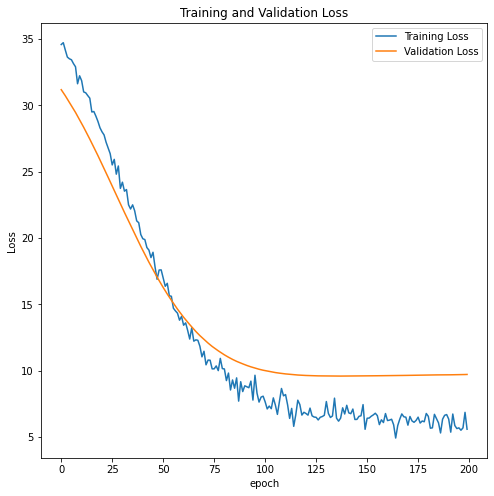

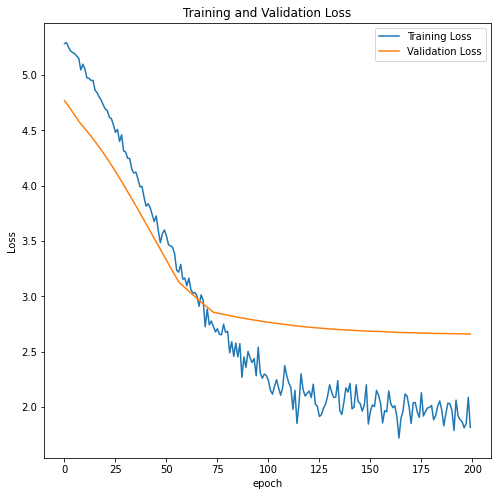

------------------------------------------------------------------------
Training for fold 3, seed 5 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 71ms/sample - loss: 32.8592 - mean_absolute_error: 4.9784 - val_loss: 35.1661 - val_mean_absolute_error: 5.4868
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 32.5483 - mean_absolute_error: 4.9433 - val_loss: 34.9210 - val_mean_absolute_error: 5.4648
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 31.9525 - mean_absolute_error: 4.9119 - val_loss: 34.6587 - val_mean_absolute_error: 5.4411
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.8581 - mean_absolute_error: 4.9019 - val_loss: 34.3875 - val_mean_absolute_error: 5.4165
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.6362 - mean_absolute_error: 4.8754 - val_loss: 34.1233 - val_mean_absolute_error: 5.3925
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.6851 - mean_absolute_error: 3.5721 - val_loss: 19.0060 - val_mean_absolute_error: 3.7559
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.0005 - mean_absolute_error: 3.5655 - val_loss: 18.6861 - val_mean_absolute_error: 3.7131
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.8830 - mean_absolute_error: 3.4340 - val_loss: 18.3612 - val_mean_absolute_error: 3.6692
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.9733 - mean_absolute_error: 3.5665 - val_loss: 18.0395 - val_mean_absolute_error: 3.6252
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.2841 - mean_absolute_error: 3.5090 - val_loss: 17.7332 - val_mean_absolute_error: 3.5827
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.7479 - mean_absolute_error: 3.4469 - val_loss: 17.4240 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.1623 - mean_absolute_error: 2.5458 - val_loss: 8.9350 - val_mean_absolute_error: 2.3080
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.9350 - mean_absolute_error: 2.7046 - val_loss: 8.8480 - val_mean_absolute_error: 2.2898
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 10.2649 - mean_absolute_error: 2.7111 - val_loss: 8.7637 - val_mean_absolute_error: 2.2720
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.6593 - mean_absolute_error: 2.6202 - val_loss: 8.6757 - val_mean_absolute_error: 2.2532
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.2679 - mean_absolute_error: 2.5981 - val_loss: 8.5940 - val_mean_absolute_error: 2.2356
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.9860 - mean_absolute_error: 2.5847 - val_loss: 8.5068 - val_mean_absolute_error: 2.2174

15/15 [==============================] - 0s 5ms/sample - loss: 8.5865 - mean_absolute_error: 2.4728 - val_loss: 6.5924 - val_mean_absolute_error: 1.9398
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2928 - mean_absolute_error: 2.2525 - val_loss: 6.5710 - val_mean_absolute_error: 1.9400
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9551 - mean_absolute_error: 2.2919 - val_loss: 6.5557 - val_mean_absolute_error: 1.9403
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2420 - mean_absolute_error: 2.2344 - val_loss: 6.5354 - val_mean_absolute_error: 1.9401
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8670 - mean_absolute_error: 2.3248 - val_loss: 6.5156 - val_mean_absolute_error: 1.9398
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.0321 - mean_absolute_error: 2.3238 - val_loss: 6.4969 - val_mean_absolute_error: 1.9397
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0741 - mean_absolute_error: 2.1780 - val_loss: 6.1287 - val_mean_absolute_error: 1.9441
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5669 - mean_absolute_error: 2.2818 - val_loss: 6.1274 - val_mean_absolute_error: 1.9447
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7581 - mean_absolute_error: 2.1856 - val_loss: 6.1188 - val_mean_absolute_error: 1.9447
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2978 - mean_absolute_error: 2.0175 - val_loss: 6.1135 - val_mean_absolute_error: 1.9447
Spearman correlation: 0.286


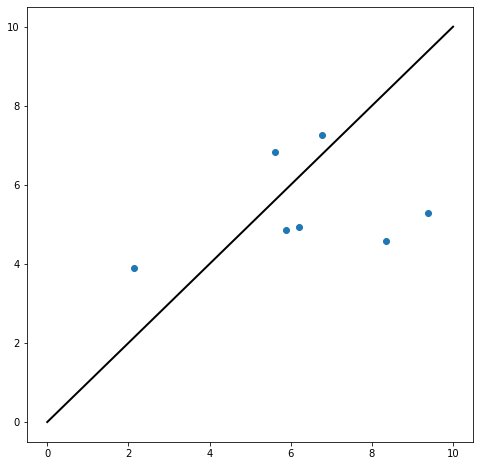

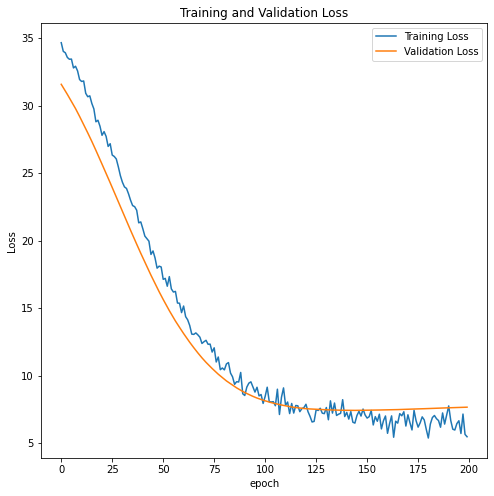

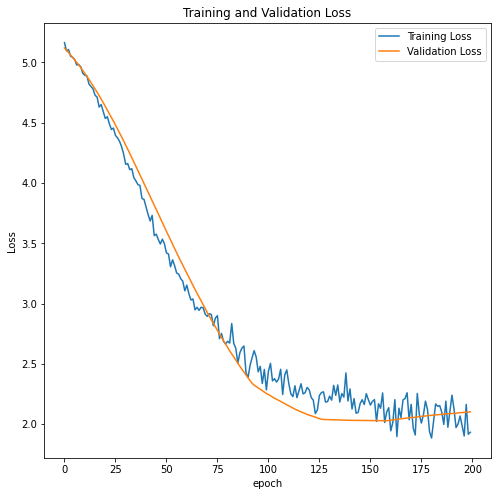

Overall spearman correlation: 0.085
------------------------------------------------------------------------
Training for fold 1, seed 6 ...
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 89ms/sample - loss: 34.0126 - mean_absolute_error: 4.9457 - val_loss: 32.3519 - val_mean_absolute_error: 5.3884
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.2733 - mean_absolute_error: 4.9883 - val_loss: 32.1120 - val_mean_absolute_error: 5.3666
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.6930 - mean_absolute_error: 4.9281 - val_loss: 31.8565 - val_mean_absolute_error: 5.3434
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.5449 - mean_absolute_error: 4.9088 - val_loss: 31.6011 - val_mean_absolute_error: 5.3200
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.0920 - mean_absolute_error: 4.8765 - val_loss: 31.3356 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 19.3431 - mean_absolute_error: 3.6228 - val_loss: 16.5662 - val_mean_absolute_error: 3.6782
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.6345 - mean_absolute_error: 3.5351 - val_loss: 16.2567 - val_mean_absolute_error: 3.6362
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.4871 - mean_absolute_error: 3.5289 - val_loss: 15.9398 - val_mean_absolute_error: 3.5929
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.2518 - mean_absolute_error: 3.5221 - val_loss: 15.6170 - val_mean_absolute_error: 3.5482
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.5394 - mean_absolute_error: 3.5101 - val_loss: 15.3065 - val_mean_absolute_error: 3.5045
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.0500 - mean_absolute_error: 3.4532 - val_loss: 15.0000 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 10.9627 - mean_absolute_error: 2.8351 - val_loss: 6.6944 - val_mean_absolute_error: 2.1837
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 11.4860 - mean_absolute_error: 2.8363 - val_loss: 6.6073 - val_mean_absolute_error: 2.1665
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 10.1668 - mean_absolute_error: 2.7088 - val_loss: 6.5088 - val_mean_absolute_error: 2.1471
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 11.3869 - mean_absolute_error: 2.8093 - val_loss: 6.4140 - val_mean_absolute_error: 2.1282
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 10.7691 - mean_absolute_error: 2.7691 - val_loss: 6.3326 - val_mean_absolute_error: 2.1117
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 10.7869 - mean_absolute_error: 2.8017 - val_loss: 6.2598 - val_mean_absolute_error: 2

Epoch 147/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.3484 - mean_absolute_error: 2.6564 - val_loss: 4.3003 - val_mean_absolute_error: 1.6021
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.6920 - mean_absolute_error: 2.5189 - val_loss: 4.2706 - val_mean_absolute_error: 1.5924
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.5465 - mean_absolute_error: 2.7345 - val_loss: 4.2541 - val_mean_absolute_error: 1.5869
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.0872 - mean_absolute_error: 2.5860 - val_loss: 4.2338 - val_mean_absolute_error: 1.5801
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.0658 - mean_absolute_error: 2.6414 - val_loss: 4.2169 - val_mean_absolute_error: 1.5746
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.5332 - mean_absolute_error: 2.6997 - val_loss: 4.2039 - val_mean_absolute_error: 1.570

14/14 [==============================] - 0s 5ms/sample - loss: 8.0972 - mean_absolute_error: 2.5488 - val_loss: 3.7640 - val_mean_absolute_error: 1.4560
Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.6376 - mean_absolute_error: 2.5852 - val_loss: 3.7478 - val_mean_absolute_error: 1.4521
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.7904 - mean_absolute_error: 2.5375 - val_loss: 3.7363 - val_mean_absolute_error: 1.4493
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.8141 - mean_absolute_error: 2.5919 - val_loss: 3.7242 - val_mean_absolute_error: 1.4461
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.2581 - mean_absolute_error: 2.5966 - val_loss: 3.7153 - val_mean_absolute_error: 1.4442
Spearman correlation: 0.286


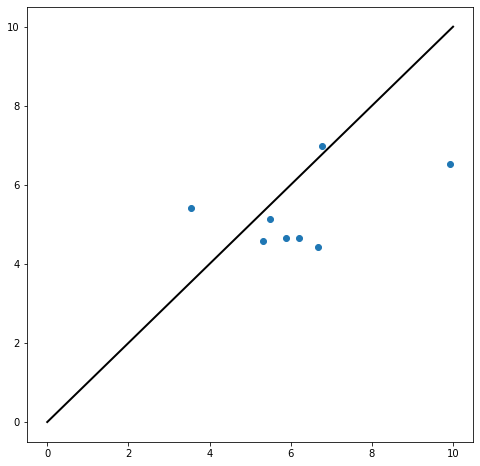

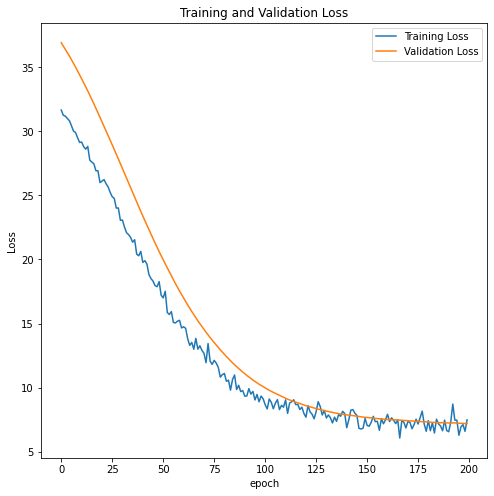

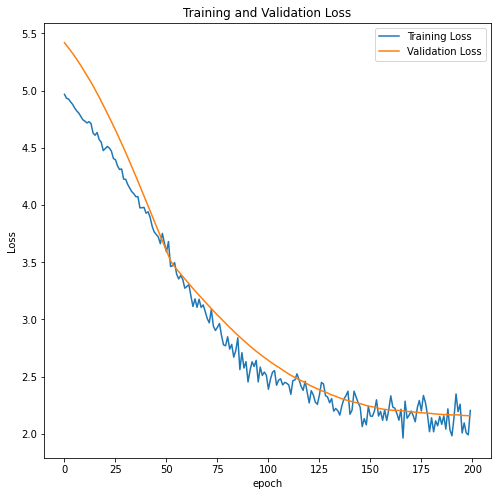

------------------------------------------------------------------------
Training for fold 2, seed 6 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 77ms/sample - loss: 32.1219 - mean_absolute_error: 5.1715 - val_loss: 36.5963 - val_mean_absolute_error: 5.0515
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 31.9633 - mean_absolute_error: 5.1520 - val_loss: 36.3447 - val_mean_absolute_error: 5.0282
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 31.6477 - mean_absolute_error: 5.1323 - val_loss: 36.0862 - val_mean_absolute_error: 5.0041
Epoch 4/200
15/15 [==============================] - 0s 4ms/sample - loss: 31.0592 - mean_absolute_error: 5.0720 - val_loss: 35.8144 - val_mean_absolute_error: 4.9787
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.3874 - mean_absolute_error: 5.1062 - val_loss: 35.5373 - val_mean_absolute_error: 4.9526
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.7812 - mean_absolute_error: 3.5533 - val_loss: 20.3857 - val_mean_absolute_error: 3.6803
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.8673 - mean_absolute_error: 3.5501 - val_loss: 20.0761 - val_mean_absolute_error: 3.6575
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6335 - mean_absolute_error: 3.4614 - val_loss: 19.7719 - val_mean_absolute_error: 3.6356
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.5491 - mean_absolute_error: 3.3544 - val_loss: 19.4657 - val_mean_absolute_error: 3.6132
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.0938 - mean_absolute_error: 3.3458 - val_loss: 19.1633 - val_mean_absolute_error: 3.5906
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.0487 - mean_absolute_error: 3.3288 - val_loss: 18.8686 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.1040 - mean_absolute_error: 2.4266 - val_loss: 11.4818 - val_mean_absolute_error: 2.7731
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7063 - mean_absolute_error: 2.3585 - val_loss: 11.4108 - val_mean_absolute_error: 2.7597
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8996 - mean_absolute_error: 2.3425 - val_loss: 11.3445 - val_mean_absolute_error: 2.7468
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2996 - mean_absolute_error: 2.2461 - val_loss: 11.2829 - val_mean_absolute_error: 2.7366
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3944 - mean_absolute_error: 2.1660 - val_loss: 11.2238 - val_mean_absolute_error: 2.7330
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0729 - mean_absolute_error: 2.1850 - val_loss: 11.1692 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 6ms/sample - loss: 6.0376 - mean_absolute_error: 1.9640 - val_loss: 10.1719 - val_mean_absolute_error: 2.6653
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9056 - mean_absolute_error: 2.0512 - val_loss: 10.1662 - val_mean_absolute_error: 2.6666
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4275 - mean_absolute_error: 1.7787 - val_loss: 10.1569 - val_mean_absolute_error: 2.6682
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6295 - mean_absolute_error: 2.0434 - val_loss: 10.1502 - val_mean_absolute_error: 2.6694
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7837 - mean_absolute_error: 1.8616 - val_loss: 10.1443 - val_mean_absolute_error: 2.6706
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3521 - mean_absolute_error: 1.9841 - val_loss: 10.1369 - val_mean_absolute_error:

Epoch 196/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4709 - mean_absolute_error: 1.7648 - val_loss: 10.0756 - val_mean_absolute_error: 2.6983
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.6711 - mean_absolute_error: 1.7947 - val_loss: 10.0741 - val_mean_absolute_error: 2.6985
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.0264 - mean_absolute_error: 1.8464 - val_loss: 10.0726 - val_mean_absolute_error: 2.6981
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5105 - mean_absolute_error: 1.7359 - val_loss: 10.0709 - val_mean_absolute_error: 2.6985
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.9377 - mean_absolute_error: 1.7753 - val_loss: 10.0700 - val_mean_absolute_error: 2.6987
Spearman correlation: 0.643


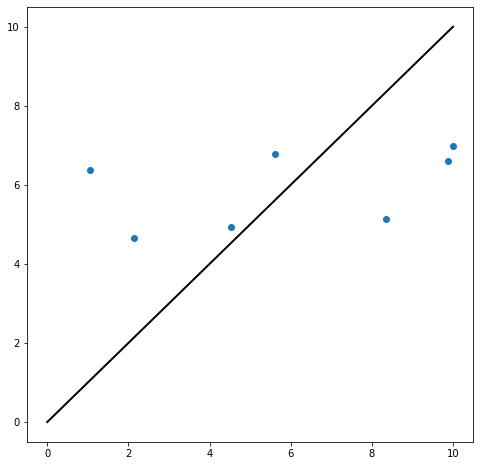

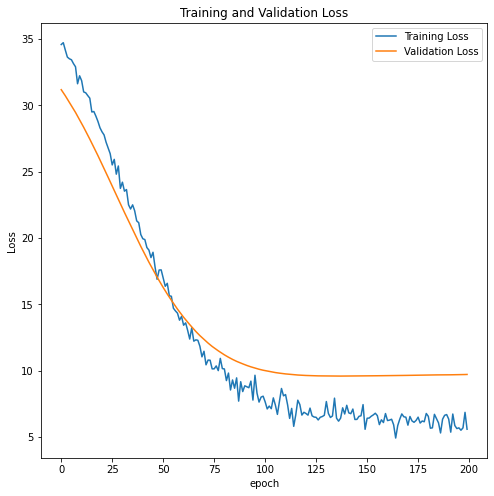

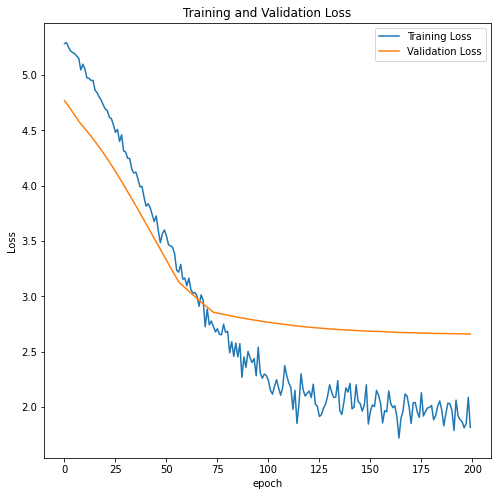

------------------------------------------------------------------------
Training for fold 3, seed 6 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 78ms/sample - loss: 34.9212 - mean_absolute_error: 5.2788 - val_loss: 31.2871 - val_mean_absolute_error: 4.8667
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.2176 - mean_absolute_error: 5.2217 - val_loss: 31.0525 - val_mean_absolute_error: 4.8466
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.0120 - mean_absolute_error: 5.2020 - val_loss: 30.8139 - val_mean_absolute_error: 4.8261
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.9077 - mean_absolute_error: 5.1923 - val_loss: 30.5686 - val_mean_absolute_error: 4.8049
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.7491 - mean_absolute_error: 5.1774 - val_loss: 30.3193 - val_mean_absolute_error: 4.7833
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6212 - mean_absolute_error: 3.4714 - val_loss: 16.6525 - val_mean_absolute_error: 3.3441
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.3507 - mean_absolute_error: 3.5662 - val_loss: 16.3950 - val_mean_absolute_error: 3.3239
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.4370 - mean_absolute_error: 3.4535 - val_loss: 16.1334 - val_mean_absolute_error: 3.3028
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.4071 - mean_absolute_error: 3.3262 - val_loss: 15.8844 - val_mean_absolute_error: 3.2825
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.6270 - mean_absolute_error: 3.3718 - val_loss: 15.6448 - val_mean_absolute_error: 3.2624
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 14.5409 - mean_absolute_error: 3.1742 - val_loss: 15.4025 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2531 - mean_absolute_error: 2.1774 - val_loss: 10.2561 - val_mean_absolute_error: 2.9529
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0915 - mean_absolute_error: 2.0637 - val_loss: 10.2271 - val_mean_absolute_error: 2.9501
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7257 - mean_absolute_error: 2.0876 - val_loss: 10.2004 - val_mean_absolute_error: 2.9474
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2080 - mean_absolute_error: 1.9747 - val_loss: 10.1741 - val_mean_absolute_error: 2.9446
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.5870 - mean_absolute_error: 2.0570 - val_loss: 10.1502 - val_mean_absolute_error: 2.9419
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8537 - mean_absolute_error: 2.0156 - val_loss: 10.1288 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.9308 - mean_absolute_error: 1.6961 - val_loss: 10.1009 - val_mean_absolute_error: 2.8771
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7248 - mean_absolute_error: 1.8485 - val_loss: 10.1089 - val_mean_absolute_error: 2.8765
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.1075 - mean_absolute_error: 1.7151 - val_loss: 10.1159 - val_mean_absolute_error: 2.8763
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.9398 - mean_absolute_error: 1.9772 - val_loss: 10.1247 - val_mean_absolute_error: 2.8753
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.0216 - mean_absolute_error: 1.7449 - val_loss: 10.1336 - val_mean_absolute_error: 2.8744
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.2906 - mean_absolute_error: 1.7799 - val_loss: 10.1446 - val_mean_absolute_error:

Epoch 196/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.7346 - mean_absolute_error: 1.7107 - val_loss: 10.4553 - val_mean_absolute_error: 2.8717
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.7864 - mean_absolute_error: 1.6701 - val_loss: 10.4625 - val_mean_absolute_error: 2.8717
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.0643 - mean_absolute_error: 1.7434 - val_loss: 10.4713 - val_mean_absolute_error: 2.8714
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 3.9140 - mean_absolute_error: 1.4886 - val_loss: 10.4774 - val_mean_absolute_error: 2.8712
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.4906 - mean_absolute_error: 1.5482 - val_loss: 10.4809 - val_mean_absolute_error: 2.8719
Spearman correlation: 0.071


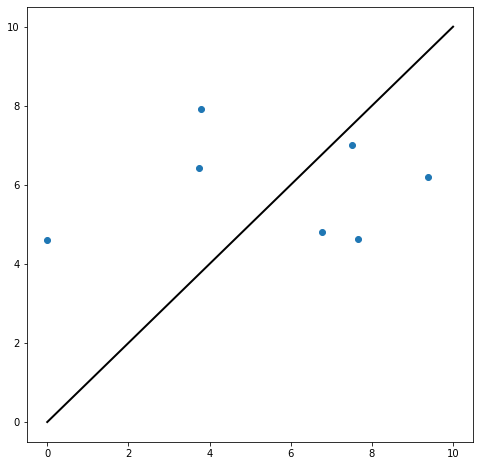

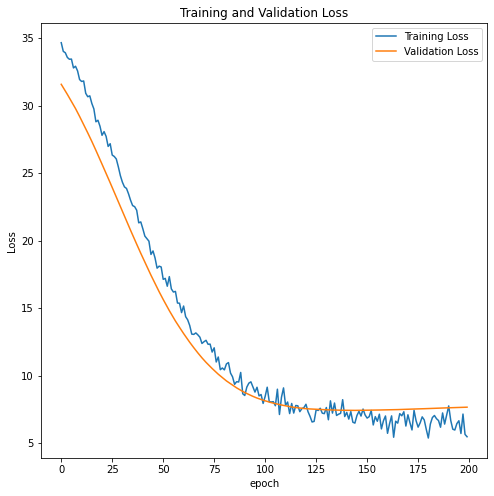

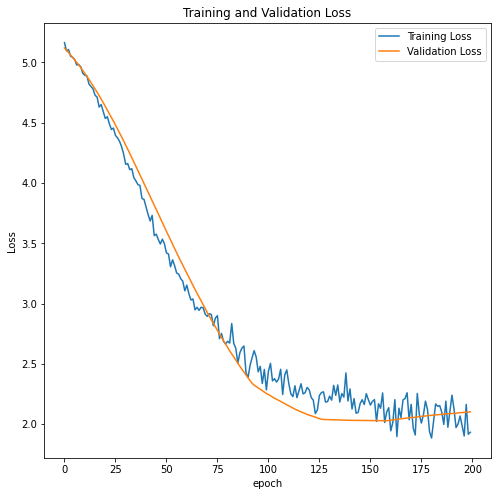

Overall spearman correlation: 0.269
------------------------------------------------------------------------
Training for fold 1, seed 7 ...
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 83ms/sample - loss: 34.6753 - mean_absolute_error: 5.1575 - val_loss: 31.3580 - val_mean_absolute_error: 5.0541
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.7581 - mean_absolute_error: 5.1627 - val_loss: 31.1219 - val_mean_absolute_error: 5.0311
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.0906 - mean_absolute_error: 5.1118 - val_loss: 30.8629 - val_mean_absolute_error: 5.0058
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.3818 - mean_absolute_error: 5.1301 - val_loss: 30.6148 - val_mean_absolute_error: 4.9814
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.8688 - mean_absolute_error: 5.0870 - val_loss: 30.3520 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.6215 - mean_absolute_error: 3.6979 - val_loss: 15.9988 - val_mean_absolute_error: 3.2204
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.8171 - mean_absolute_error: 3.6344 - val_loss: 15.7034 - val_mean_absolute_error: 3.1890
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.4203 - mean_absolute_error: 3.7151 - val_loss: 15.4190 - val_mean_absolute_error: 3.1629
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.8866 - mean_absolute_error: 3.4898 - val_loss: 15.1314 - val_mean_absolute_error: 3.1404
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.6415 - mean_absolute_error: 3.6388 - val_loss: 14.8467 - val_mean_absolute_error: 3.1178
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.7755 - mean_absolute_error: 3.4846 - val_loss: 14.5797 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.7722 - mean_absolute_error: 2.6307 - val_loss: 7.6368 - val_mean_absolute_error: 2.2985
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.6486 - mean_absolute_error: 2.5986 - val_loss: 7.5795 - val_mean_absolute_error: 2.2875
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.7454 - mean_absolute_error: 2.6644 - val_loss: 7.5202 - val_mean_absolute_error: 2.2758
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.8857 - mean_absolute_error: 2.4952 - val_loss: 7.4521 - val_mean_absolute_error: 2.2621
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.6699 - mean_absolute_error: 2.6005 - val_loss: 7.3939 - val_mean_absolute_error: 2.2501
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.2603 - mean_absolute_error: 2.3432 - val_loss: 7.3335 - val_mean_absolute_error: 2.2373


14/14 [==============================] - 0s 5ms/sample - loss: 9.2067 - mean_absolute_error: 2.5544 - val_loss: 6.2666 - val_mean_absolute_error: 2.0160
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.0085 - mean_absolute_error: 2.1932 - val_loss: 6.2597 - val_mean_absolute_error: 2.0140
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.7279 - mean_absolute_error: 2.3304 - val_loss: 6.2509 - val_mean_absolute_error: 2.0116
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.4709 - mean_absolute_error: 2.4805 - val_loss: 6.2422 - val_mean_absolute_error: 2.0092
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9146 - mean_absolute_error: 2.1429 - val_loss: 6.2341 - val_mean_absolute_error: 2.0069
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.5739 - mean_absolute_error: 2.2889 - val_loss: 6.2303 - val_mean_absolute_error: 2.0056
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.2115 - mean_absolute_error: 2.1638 - val_loss: 6.1439 - val_mean_absolute_error: 2.0003
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.1557 - mean_absolute_error: 2.0400 - val_loss: 6.1454 - val_mean_absolute_error: 2.0003
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.0207 - mean_absolute_error: 2.1893 - val_loss: 6.1453 - val_mean_absolute_error: 2.0003
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9643 - mean_absolute_error: 2.2033 - val_loss: 6.1434 - val_mean_absolute_error: 2.0001
Spearman correlation: 0.000


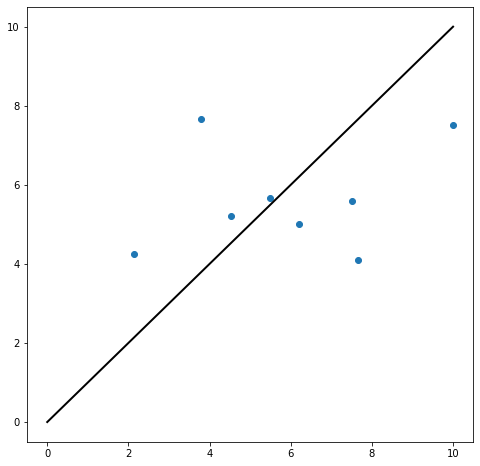

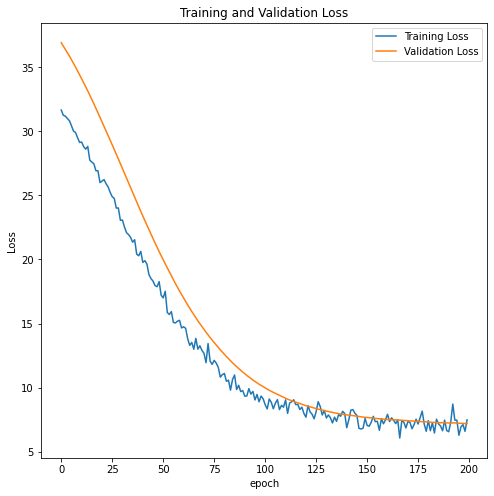

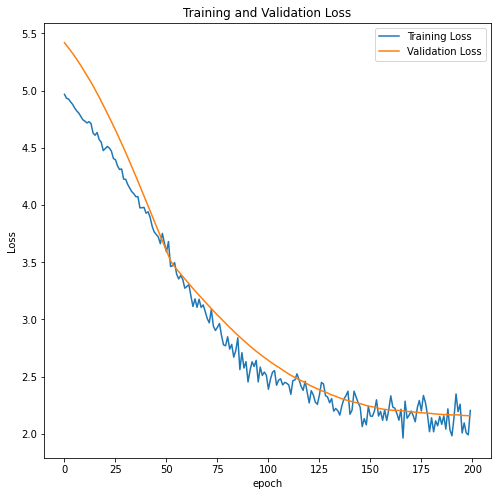

------------------------------------------------------------------------
Training for fold 2, seed 7 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 78ms/sample - loss: 34.0754 - mean_absolute_error: 5.1942 - val_loss: 32.1833 - val_mean_absolute_error: 4.9899
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.0047 - mean_absolute_error: 5.1873 - val_loss: 31.9495 - val_mean_absolute_error: 4.9661
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.5126 - mean_absolute_error: 5.1430 - val_loss: 31.7034 - val_mean_absolute_error: 4.9409
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.2017 - mean_absolute_error: 5.1207 - val_loss: 31.4558 - val_mean_absolute_error: 4.9154
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.0762 - mean_absolute_error: 5.1019 - val_loss: 31.2003 - val_mean_absolute_error: 4.8889
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.5101 - mean_absolute_error: 3.4497 - val_loss: 17.3545 - val_mean_absolute_error: 3.5801
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.0845 - mean_absolute_error: 3.3787 - val_loss: 17.0766 - val_mean_absolute_error: 3.5467
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.0754 - mean_absolute_error: 3.3473 - val_loss: 16.8016 - val_mean_absolute_error: 3.5131
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.1372 - mean_absolute_error: 3.3622 - val_loss: 16.5326 - val_mean_absolute_error: 3.4797
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.2103 - mean_absolute_error: 3.3130 - val_loss: 16.2750 - val_mean_absolute_error: 3.4470
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 14.9257 - mean_absolute_error: 3.2468 - val_loss: 16.0189 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5177 - mean_absolute_error: 2.3439 - val_loss: 10.2178 - val_mean_absolute_error: 2.3595
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5408 - mean_absolute_error: 2.3324 - val_loss: 10.1764 - val_mean_absolute_error: 2.3482
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5200 - mean_absolute_error: 2.5351 - val_loss: 10.1324 - val_mean_absolute_error: 2.3363
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9578 - mean_absolute_error: 2.2209 - val_loss: 10.0926 - val_mean_absolute_error: 2.3322
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9431 - mean_absolute_error: 2.2441 - val_loss: 10.0563 - val_mean_absolute_error: 2.3300
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.6807 - mean_absolute_error: 2.3484 - val_loss: 10.0248 - val_mean_absolute_error: 2

15/15 [==============================] - 0s 5ms/sample - loss: 5.8503 - mean_absolute_error: 1.9856 - val_loss: 9.7365 - val_mean_absolute_error: 2.4432
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.8748 - mean_absolute_error: 2.0528 - val_loss: 9.7387 - val_mean_absolute_error: 2.4476
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4536 - mean_absolute_error: 1.8342 - val_loss: 9.7452 - val_mean_absolute_error: 2.4512
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7162 - mean_absolute_error: 1.9602 - val_loss: 9.7503 - val_mean_absolute_error: 2.4542
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7347 - mean_absolute_error: 1.9040 - val_loss: 9.7550 - val_mean_absolute_error: 2.4561
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3141 - mean_absolute_error: 2.0382 - val_loss: 9.7613 - val_mean_absolute_error: 2.4596
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.1146 - mean_absolute_error: 1.7705 - val_loss: 10.0322 - val_mean_absolute_error: 2.5611
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.3049 - mean_absolute_error: 1.7870 - val_loss: 10.0362 - val_mean_absolute_error: 2.5620
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.0685 - mean_absolute_error: 1.8109 - val_loss: 10.0430 - val_mean_absolute_error: 2.5641
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4174 - mean_absolute_error: 1.8803 - val_loss: 10.0474 - val_mean_absolute_error: 2.5652
Spearman correlation: -0.321


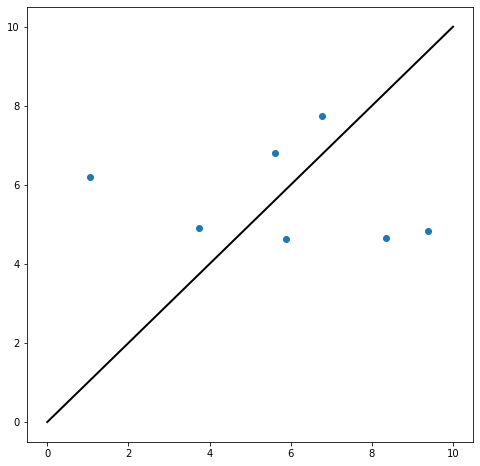

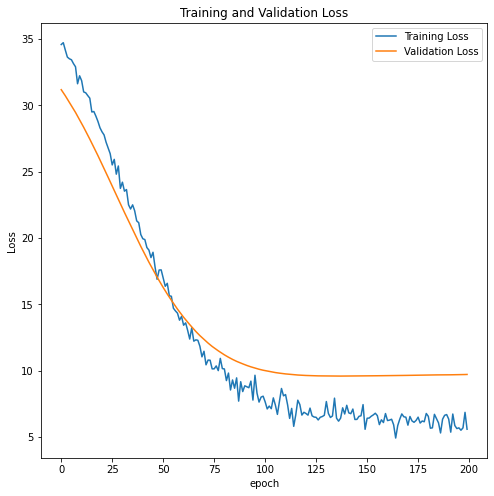

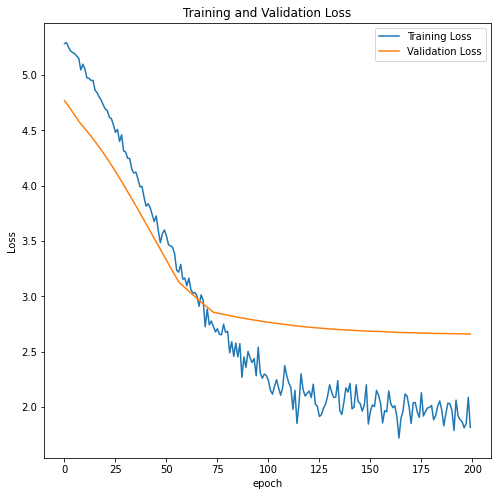

------------------------------------------------------------------------
Training for fold 3, seed 7 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 78ms/sample - loss: 31.8458 - mean_absolute_error: 5.0404 - val_loss: 36.8786 - val_mean_absolute_error: 5.3288
Epoch 2/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.9167 - mean_absolute_error: 5.0350 - val_loss: 36.6237 - val_mean_absolute_error: 5.3108
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.7648 - mean_absolute_error: 5.0108 - val_loss: 36.3681 - val_mean_absolute_error: 5.2927
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 31.0734 - mean_absolute_error: 4.9589 - val_loss: 36.0972 - val_mean_absolute_error: 5.2734
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 30.7544 - mean_absolute_error: 4.9375 - val_loss: 35.8218 - val_mean_absolute_error: 5.2537
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.1119 - mean_absolute_error: 3.5881 - val_loss: 20.4108 - val_mean_absolute_error: 3.9366
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.1759 - mean_absolute_error: 3.5869 - val_loss: 20.0903 - val_mean_absolute_error: 3.9024
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.1765 - mean_absolute_error: 3.4899 - val_loss: 19.7736 - val_mean_absolute_error: 3.8681
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.0775 - mean_absolute_error: 3.3895 - val_loss: 19.4538 - val_mean_absolute_error: 3.8330
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.7992 - mean_absolute_error: 3.3488 - val_loss: 19.1375 - val_mean_absolute_error: 3.7978
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.1251 - mean_absolute_error: 3.3832 - val_loss: 18.8341 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.4090 - mean_absolute_error: 2.2973 - val_loss: 10.7665 - val_mean_absolute_error: 2.9227
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.6974 - mean_absolute_error: 2.3288 - val_loss: 10.6845 - val_mean_absolute_error: 2.9105
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5667 - mean_absolute_error: 2.3177 - val_loss: 10.6089 - val_mean_absolute_error: 2.8990
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2485 - mean_absolute_error: 2.3217 - val_loss: 10.5295 - val_mean_absolute_error: 2.8867
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2062 - mean_absolute_error: 2.2995 - val_loss: 10.4495 - val_mean_absolute_error: 2.8741
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.1926 - mean_absolute_error: 2.3479 - val_loss: 10.3867 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9725 - mean_absolute_error: 1.9708 - val_loss: 9.1234 - val_mean_absolute_error: 2.5560
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7486 - mean_absolute_error: 2.0932 - val_loss: 9.1202 - val_mean_absolute_error: 2.5527
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6535 - mean_absolute_error: 2.0348 - val_loss: 9.1089 - val_mean_absolute_error: 2.5471
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3337 - mean_absolute_error: 1.8844 - val_loss: 9.1058 - val_mean_absolute_error: 2.5442
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7535 - mean_absolute_error: 1.7451 - val_loss: 9.0988 - val_mean_absolute_error: 2.5403
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8133 - mean_absolute_error: 2.0660 - val_loss: 9.0945 - val_mean_absolute_error: 2.536

15/15 [==============================] - 0s 5ms/sample - loss: 5.9270 - mean_absolute_error: 1.8040 - val_loss: 9.1438 - val_mean_absolute_error: 2.5031
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3459 - mean_absolute_error: 1.9468 - val_loss: 9.1512 - val_mean_absolute_error: 2.5039
Epoch 198/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.4211 - mean_absolute_error: 1.7919 - val_loss: 9.1530 - val_mean_absolute_error: 2.5038
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4073 - mean_absolute_error: 1.7457 - val_loss: 9.1589 - val_mean_absolute_error: 2.5045
Epoch 200/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.4582 - mean_absolute_error: 1.7711 - val_loss: 9.1628 - val_mean_absolute_error: 2.5047
Spearman correlation: 0.571


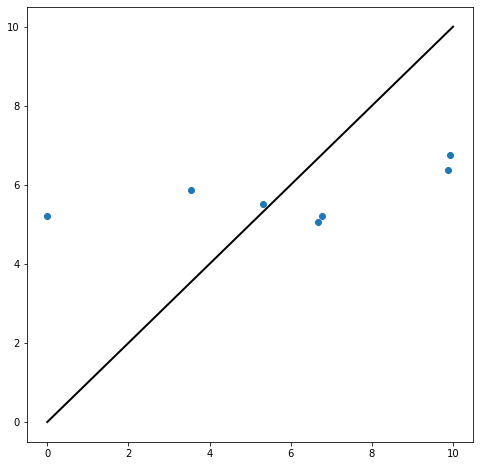

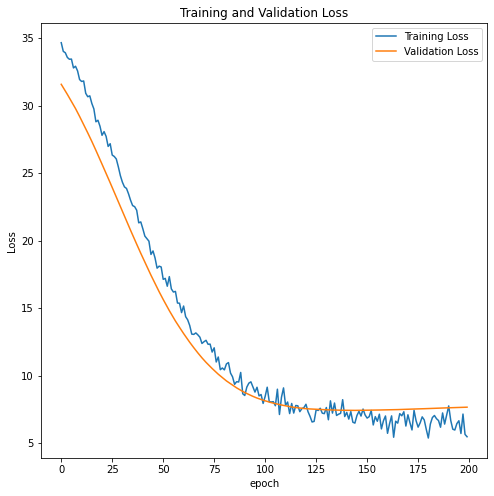

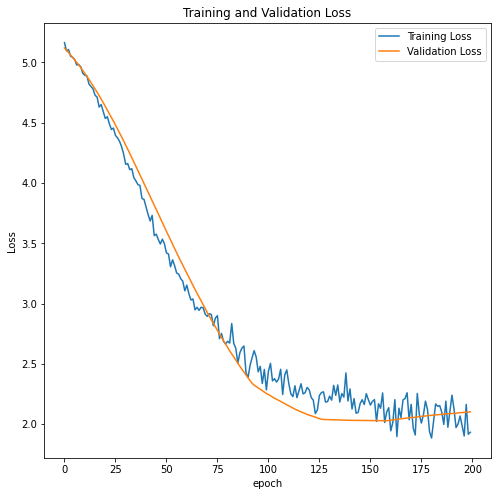

Overall spearman correlation: 0.102
------------------------------------------------------------------------
Training for fold 1, seed 8 ...
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 87ms/sample - loss: 33.4761 - mean_absolute_error: 4.9839 - val_loss: 33.8783 - val_mean_absolute_error: 5.4116
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 32.4154 - mean_absolute_error: 4.9007 - val_loss: 33.6200 - val_mean_absolute_error: 5.3875
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 32.8820 - mean_absolute_error: 4.9194 - val_loss: 33.3643 - val_mean_absolute_error: 5.3636
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 32.4956 - mean_absolute_error: 4.8983 - val_loss: 33.1020 - val_mean_absolute_error: 5.3389
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 32.4530 - mean_absolute_error: 4.8786 - val_loss: 32.8302 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.3677 - mean_absolute_error: 3.6336 - val_loss: 17.9726 - val_mean_absolute_error: 3.6247
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.5402 - mean_absolute_error: 3.5372 - val_loss: 17.6655 - val_mean_absolute_error: 3.5808
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.0588 - mean_absolute_error: 3.5921 - val_loss: 17.3667 - val_mean_absolute_error: 3.5387
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.5648 - mean_absolute_error: 3.4107 - val_loss: 17.0628 - val_mean_absolute_error: 3.5087
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.1640 - mean_absolute_error: 3.3921 - val_loss: 16.7644 - val_mean_absolute_error: 3.4788
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.7020 - mean_absolute_error: 3.4513 - val_loss: 16.4661 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.9524 - mean_absolute_error: 2.7159 - val_loss: 8.6992 - val_mean_absolute_error: 2.3861
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 10.0168 - mean_absolute_error: 2.6165 - val_loss: 8.6139 - val_mean_absolute_error: 2.3685
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.3114 - mean_absolute_error: 2.6179 - val_loss: 8.5367 - val_mean_absolute_error: 2.3523
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.5053 - mean_absolute_error: 2.6182 - val_loss: 8.4525 - val_mean_absolute_error: 2.3343
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.3255 - mean_absolute_error: 2.6348 - val_loss: 8.3742 - val_mean_absolute_error: 2.3173
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.4509 - mean_absolute_error: 2.4435 - val_loss: 8.2927 - val_mean_absolute_error: 2.3013

14/14 [==============================] - 0s 5ms/sample - loss: 7.0271 - mean_absolute_error: 2.2442 - val_loss: 6.8247 - val_mean_absolute_error: 2.0526
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.6811 - mean_absolute_error: 2.5757 - val_loss: 6.8114 - val_mean_absolute_error: 2.0515
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.3714 - mean_absolute_error: 2.3420 - val_loss: 6.8038 - val_mean_absolute_error: 2.0514
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.7006 - mean_absolute_error: 2.3400 - val_loss: 6.7913 - val_mean_absolute_error: 2.0511
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.6527 - mean_absolute_error: 2.4821 - val_loss: 6.7860 - val_mean_absolute_error: 2.0511
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.0831 - mean_absolute_error: 2.3877 - val_loss: 6.7817 - val_mean_absolute_error: 2.0512
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.5542 - mean_absolute_error: 2.3117 - val_loss: 6.6263 - val_mean_absolute_error: 2.0579
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.3554 - mean_absolute_error: 2.0974 - val_loss: 6.6279 - val_mean_absolute_error: 2.0586
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9858 - mean_absolute_error: 2.1533 - val_loss: 6.6338 - val_mean_absolute_error: 2.0599
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.0624 - mean_absolute_error: 2.0393 - val_loss: 6.6306 - val_mean_absolute_error: 2.0600
Spearman correlation: 0.048


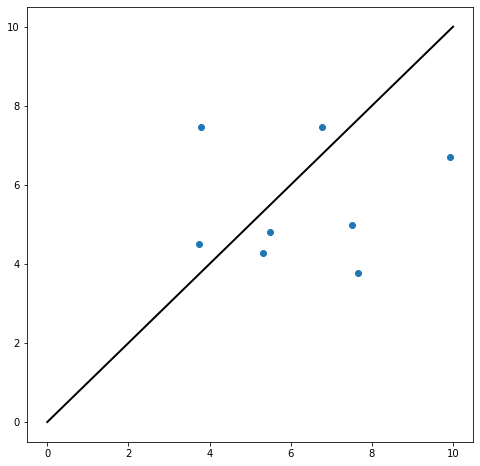

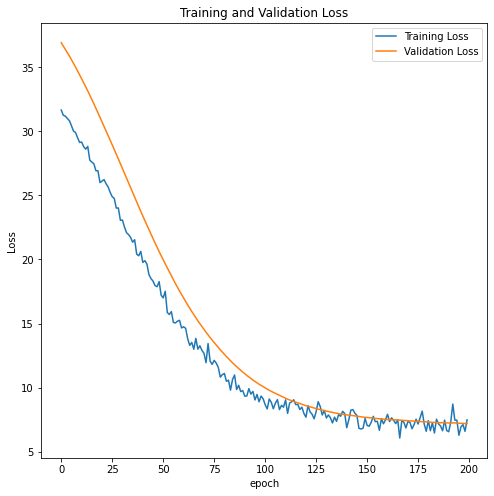

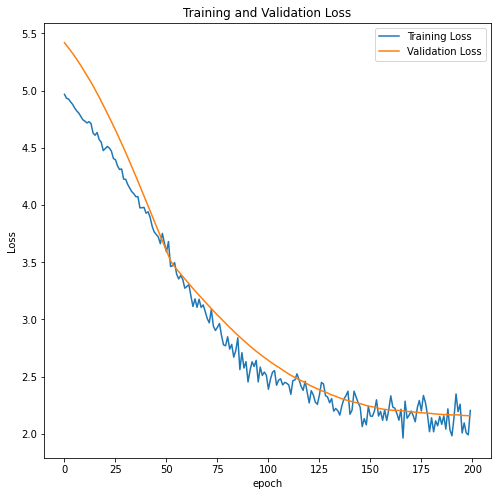

------------------------------------------------------------------------
Training for fold 2, seed 8 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 83ms/sample - loss: 33.7719 - mean_absolute_error: 5.3199 - val_loss: 33.0434 - val_mean_absolute_error: 4.7153
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.1639 - mean_absolute_error: 5.2830 - val_loss: 32.7907 - val_mean_absolute_error: 4.6952
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.5376 - mean_absolute_error: 5.3065 - val_loss: 32.5460 - val_mean_absolute_error: 4.6756
Epoch 4/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.1163 - mean_absolute_error: 5.2555 - val_loss: 32.2942 - val_mean_absolute_error: 4.6553
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 32.5832 - mean_absolute_error: 5.2202 - val_loss: 32.0327 - val_mean_absolute_error: 4.6341
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 4ms/sample - loss: 17.0116 - mean_absolute_error: 3.6548 - val_loss: 17.9380 - val_mean_absolute_error: 3.2771
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.5721 - mean_absolute_error: 3.6381 - val_loss: 17.6545 - val_mean_absolute_error: 3.2509
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.4406 - mean_absolute_error: 3.7408 - val_loss: 17.3801 - val_mean_absolute_error: 3.2252
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.2680 - mean_absolute_error: 3.5370 - val_loss: 17.1120 - val_mean_absolute_error: 3.1999
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.6513 - mean_absolute_error: 3.5682 - val_loss: 16.8575 - val_mean_absolute_error: 3.1756
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.3436 - mean_absolute_error: 3.4693 - val_loss: 16.5997 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5593 - mean_absolute_error: 2.2432 - val_loss: 10.7854 - val_mean_absolute_error: 2.8444
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.4667 - mean_absolute_error: 2.1650 - val_loss: 10.7471 - val_mean_absolute_error: 2.8473
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.4850 - mean_absolute_error: 2.3478 - val_loss: 10.7131 - val_mean_absolute_error: 2.8501
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.6409 - mean_absolute_error: 2.1767 - val_loss: 10.6761 - val_mean_absolute_error: 2.8531
Epoch 102/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.6241 - mean_absolute_error: 2.2486 - val_loss: 10.6472 - val_mean_absolute_error: 2.8556
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9999 - mean_absolute_error: 2.1179 - val_loss: 10.6198 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.3922 - mean_absolute_error: 1.7942 - val_loss: 10.4171 - val_mean_absolute_error: 2.9315
Epoch 148/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.1217 - mean_absolute_error: 1.9148 - val_loss: 10.4218 - val_mean_absolute_error: 2.9323
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.8225 - mean_absolute_error: 1.7324 - val_loss: 10.4282 - val_mean_absolute_error: 2.9334
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5345 - mean_absolute_error: 1.7546 - val_loss: 10.4321 - val_mean_absolute_error: 2.9342
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.2823 - mean_absolute_error: 1.6933 - val_loss: 10.4385 - val_mean_absolute_error: 2.9353
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7561 - mean_absolute_error: 1.6955 - val_loss: 10.4430 - val_mean_absolute_error:

Epoch 196/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.3719 - mean_absolute_error: 1.5437 - val_loss: 10.6573 - val_mean_absolute_error: 2.9513
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7548 - mean_absolute_error: 1.7563 - val_loss: 10.6554 - val_mean_absolute_error: 2.9507
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.7771 - mean_absolute_error: 1.6072 - val_loss: 10.6595 - val_mean_absolute_error: 2.9507
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.1500 - mean_absolute_error: 1.6282 - val_loss: 10.6639 - val_mean_absolute_error: 2.9509
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.7160 - mean_absolute_error: 1.5694 - val_loss: 10.6658 - val_mean_absolute_error: 2.9508
Spearman correlation: 0.750


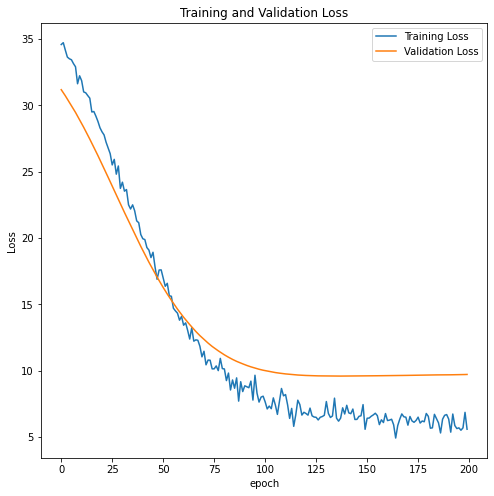

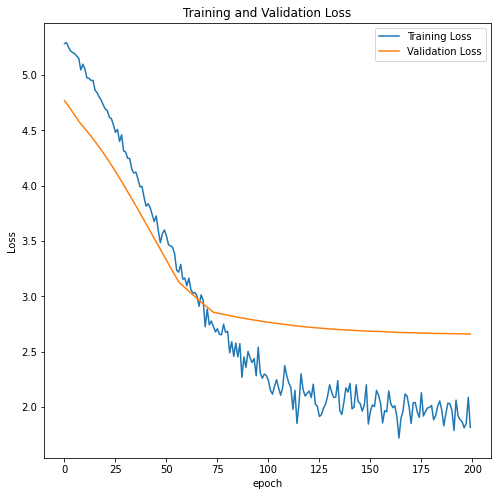

------------------------------------------------------------------------
Training for fold 3, seed 8 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 84ms/sample - loss: 33.9888 - mean_absolute_error: 5.1191 - val_loss: 33.1655 - val_mean_absolute_error: 5.1930
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 33.4131 - mean_absolute_error: 5.0770 - val_loss: 32.9160 - val_mean_absolute_error: 5.1695
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.3623 - mean_absolute_error: 5.0669 - val_loss: 32.6723 - val_mean_absolute_error: 5.1463
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 33.1492 - mean_absolute_error: 5.0501 - val_loss: 32.4147 - val_mean_absolute_error: 5.1218
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 32.6470 - mean_absolute_error: 5.0007 - val_loss: 32.1495 - val_mean_absolute_error: 5.0963
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.0630 - mean_absolute_error: 3.3371 - val_loss: 17.5150 - val_mean_absolute_error: 3.8512
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.2365 - mean_absolute_error: 3.3501 - val_loss: 17.2155 - val_mean_absolute_error: 3.8199
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.4742 - mean_absolute_error: 3.2912 - val_loss: 16.9179 - val_mean_absolute_error: 3.7884
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.7797 - mean_absolute_error: 3.3231 - val_loss: 16.6328 - val_mean_absolute_error: 3.7577
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.5417 - mean_absolute_error: 3.1580 - val_loss: 16.3403 - val_mean_absolute_error: 3.7257
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.3691 - mean_absolute_error: 3.2439 - val_loss: 16.0632 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.2700 - mean_absolute_error: 2.5142 - val_loss: 8.9086 - val_mean_absolute_error: 2.5907
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.1336 - mean_absolute_error: 2.2908 - val_loss: 8.8414 - val_mean_absolute_error: 2.5737
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.6294 - mean_absolute_error: 2.3429 - val_loss: 8.7775 - val_mean_absolute_error: 2.5572
Epoch 101/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.8424 - mean_absolute_error: 2.4188 - val_loss: 8.7145 - val_mean_absolute_error: 2.5406
Epoch 102/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.1831 - mean_absolute_error: 2.2928 - val_loss: 8.6539 - val_mean_absolute_error: 2.5258
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.1760 - mean_absolute_error: 2.4536 - val_loss: 8.5973 - val_mean_absolute_error: 2.5179


15/15 [==============================] - 0s 5ms/sample - loss: 6.9210 - mean_absolute_error: 2.1020 - val_loss: 7.4395 - val_mean_absolute_error: 2.2904
Epoch 148/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.9863 - mean_absolute_error: 2.2393 - val_loss: 7.4335 - val_mean_absolute_error: 2.2884
Epoch 149/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.9171 - mean_absolute_error: 2.3615 - val_loss: 7.4275 - val_mean_absolute_error: 2.2863
Epoch 150/200
15/15 [==============================] - 0s 4ms/sample - loss: 7.3583 - mean_absolute_error: 2.1783 - val_loss: 7.4192 - val_mean_absolute_error: 2.2835
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2082 - mean_absolute_error: 2.1964 - val_loss: 7.4155 - val_mean_absolute_error: 2.2819
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.3696 - mean_absolute_error: 2.2037 - val_loss: 7.4084 - val_mean_absolute_error: 2.2794
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.1987 - mean_absolute_error: 2.1799 - val_loss: 7.2867 - val_mean_absolute_error: 2.2134
Epoch 198/200
15/15 [==============================] - 0s 4ms/sample - loss: 6.7280 - mean_absolute_error: 2.1167 - val_loss: 7.2887 - val_mean_absolute_error: 2.2141
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.4285 - mean_absolute_error: 1.9926 - val_loss: 7.2882 - val_mean_absolute_error: 2.2132
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9772 - mean_absolute_error: 2.1156 - val_loss: 7.2894 - val_mean_absolute_error: 2.2135
Spearman correlation: -0.179


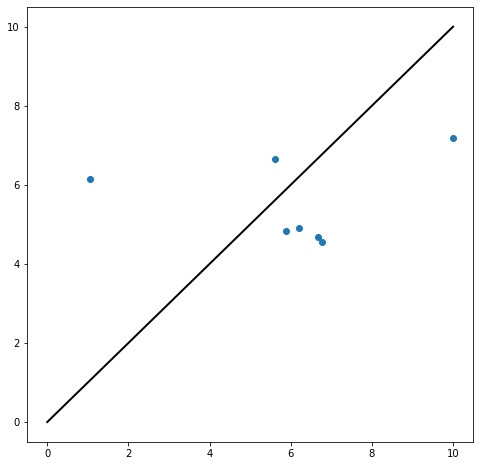

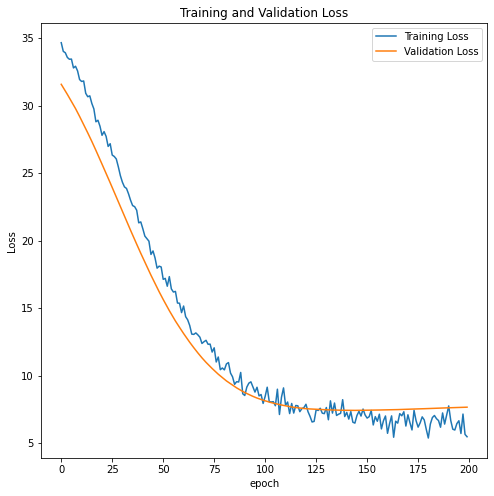

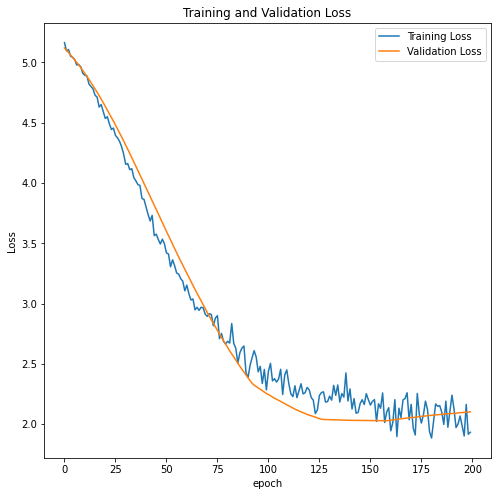

Overall spearman correlation: 0.215
------------------------------------------------------------------------
Training for fold 1, seed 9 ...
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 91ms/sample - loss: 36.1945 - mean_absolute_error: 5.4601 - val_loss: 28.6078 - val_mean_absolute_error: 4.5239
Epoch 2/200
14/14 [==============================] - 0s 4ms/sample - loss: 35.9336 - mean_absolute_error: 5.4317 - val_loss: 28.3747 - val_mean_absolute_error: 4.4984
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 35.9124 - mean_absolute_error: 5.4226 - val_loss: 28.1373 - val_mean_absolute_error: 4.4724
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 35.3583 - mean_absolute_error: 5.3813 - val_loss: 27.8933 - val_mean_absolute_error: 4.4453
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 35.3842 - mean_absolute_error: 5.3783 - val_loss: 27.6577 - val_mean_abs

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.8991 - mean_absolute_error: 3.6557 - val_loss: 14.4029 - val_mean_absolute_error: 3.1040
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.4473 - mean_absolute_error: 3.5674 - val_loss: 14.1537 - val_mean_absolute_error: 3.0785
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.9698 - mean_absolute_error: 3.5162 - val_loss: 13.9097 - val_mean_absolute_error: 3.0531
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.5294 - mean_absolute_error: 3.5715 - val_loss: 13.6738 - val_mean_absolute_error: 3.0279
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 15.8759 - mean_absolute_error: 3.4364 - val_loss: 13.4388 - val_mean_absolute_error: 3.0075
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.4082 - mean_absolute_error: 3.4149 - val_loss: 13.2129 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.5767 - mean_absolute_error: 2.3107 - val_loss: 8.5877 - val_mean_absolute_error: 2.6075
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.3421 - mean_absolute_error: 2.0800 - val_loss: 8.5651 - val_mean_absolute_error: 2.6016
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.2359 - mean_absolute_error: 2.2210 - val_loss: 8.5440 - val_mean_absolute_error: 2.5956
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.3856 - mean_absolute_error: 2.1122 - val_loss: 8.5251 - val_mean_absolute_error: 2.5899
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.8787 - mean_absolute_error: 2.1503 - val_loss: 8.5085 - val_mean_absolute_error: 2.5845
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.0161 - mean_absolute_error: 2.1747 - val_loss: 8.4910 - val_mean_absolute_error: 2.5784


14/14 [==============================] - 0s 5ms/sample - loss: 7.1069 - mean_absolute_error: 2.0853 - val_loss: 8.5492 - val_mean_absolute_error: 2.4186
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.9348 - mean_absolute_error: 2.0446 - val_loss: 8.5551 - val_mean_absolute_error: 2.4167
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.8667 - mean_absolute_error: 1.9170 - val_loss: 8.5630 - val_mean_absolute_error: 2.4151
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.0774 - mean_absolute_error: 1.8941 - val_loss: 8.5682 - val_mean_absolute_error: 2.4134
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.7940 - mean_absolute_error: 2.0732 - val_loss: 8.5715 - val_mean_absolute_error: 2.4127
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.0971 - mean_absolute_error: 2.0727 - val_loss: 8.5763 - val_mean_absolute_error: 2.4112
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.9645 - mean_absolute_error: 1.9558 - val_loss: 8.8117 - val_mean_absolute_error: 2.3573
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.3230 - mean_absolute_error: 2.0371 - val_loss: 8.8132 - val_mean_absolute_error: 2.3572
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.2822 - mean_absolute_error: 1.9938 - val_loss: 8.8153 - val_mean_absolute_error: 2.3571
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.3391 - mean_absolute_error: 2.0098 - val_loss: 8.8142 - val_mean_absolute_error: 2.3571
Spearman correlation: 0.190


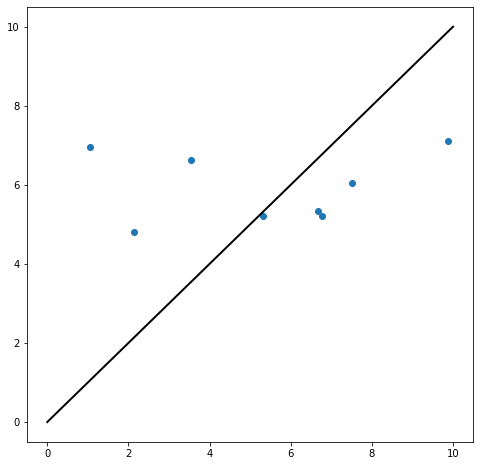

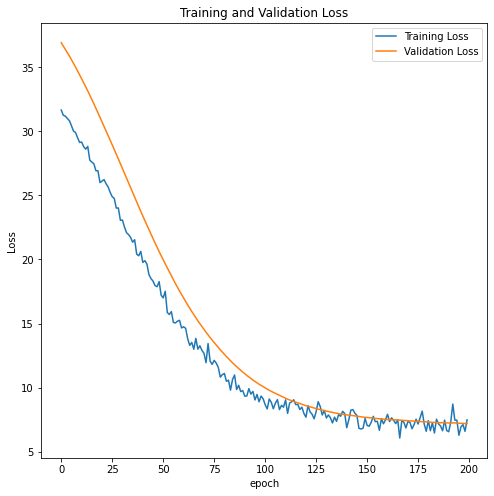

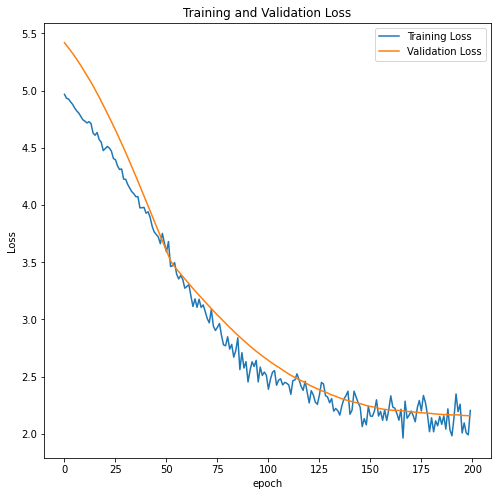

------------------------------------------------------------------------
Training for fold 2, seed 9 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 85ms/sample - loss: 29.7586 - mean_absolute_error: 4.6779 - val_loss: 41.8608 - val_mean_absolute_error: 6.1250
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 29.3611 - mean_absolute_error: 4.6433 - val_loss: 41.5886 - val_mean_absolute_error: 6.1036
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 29.4965 - mean_absolute_error: 4.6444 - val_loss: 41.3215 - val_mean_absolute_error: 6.0826
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 29.0940 - mean_absolute_error: 4.6178 - val_loss: 41.0326 - val_mean_absolute_error: 6.0598
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 29.1396 - mean_absolute_error: 4.6066 - val_loss: 40.7575 - val_mean_absolute_error: 6.0379
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.1256 - mean_absolute_error: 3.5078 - val_loss: 24.5425 - val_mean_absolute_error: 4.5543
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.4481 - mean_absolute_error: 3.4393 - val_loss: 24.1689 - val_mean_absolute_error: 4.5140
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.5244 - mean_absolute_error: 3.4385 - val_loss: 23.8068 - val_mean_absolute_error: 4.4745
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.3350 - mean_absolute_error: 3.4430 - val_loss: 23.4446 - val_mean_absolute_error: 4.4347
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.5386 - mean_absolute_error: 3.4399 - val_loss: 23.0911 - val_mean_absolute_error: 4.3955
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.2927 - mean_absolute_error: 3.4316 - val_loss: 22.7533 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.8649 - mean_absolute_error: 2.6490 - val_loss: 11.8374 - val_mean_absolute_error: 2.8740
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.9554 - mean_absolute_error: 2.6534 - val_loss: 11.6871 - val_mean_absolute_error: 2.8482
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.5937 - mean_absolute_error: 2.6268 - val_loss: 11.5411 - val_mean_absolute_error: 2.8227
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.4652 - mean_absolute_error: 2.6348 - val_loss: 11.4021 - val_mean_absolute_error: 2.7985
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.2110 - mean_absolute_error: 2.6232 - val_loss: 11.2667 - val_mean_absolute_error: 2.7746
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 10.1615 - mean_absolute_error: 2.7322 - val_loss: 11.1322 - val_mean_absolute_error: 

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.5714 - mean_absolute_error: 2.4678 - val_loss: 7.6479 - val_mean_absolute_error: 2.0941
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.0149 - mean_absolute_error: 2.5404 - val_loss: 7.6115 - val_mean_absolute_error: 2.0880
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.2094 - mean_absolute_error: 2.4918 - val_loss: 7.5679 - val_mean_absolute_error: 2.0809
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.9106 - mean_absolute_error: 2.5392 - val_loss: 7.5252 - val_mean_absolute_error: 2.0740
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8470 - mean_absolute_error: 2.3409 - val_loss: 7.4812 - val_mean_absolute_error: 2.0669
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.3336 - mean_absolute_error: 2.4578 - val_loss: 7.4501 - val_mean_absolute_error: 2.061

15/15 [==============================] - 0s 5ms/sample - loss: 8.0985 - mean_absolute_error: 2.3638 - val_loss: 6.4408 - val_mean_absolute_error: 1.8873
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2961 - mean_absolute_error: 2.2614 - val_loss: 6.4363 - val_mean_absolute_error: 1.8869
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.4341 - mean_absolute_error: 2.4738 - val_loss: 6.4220 - val_mean_absolute_error: 1.8845
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2192 - mean_absolute_error: 2.2309 - val_loss: 6.4125 - val_mean_absolute_error: 1.8828
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.3981 - mean_absolute_error: 2.3329 - val_loss: 6.4119 - val_mean_absolute_error: 1.8828
Spearman correlation: 0.536


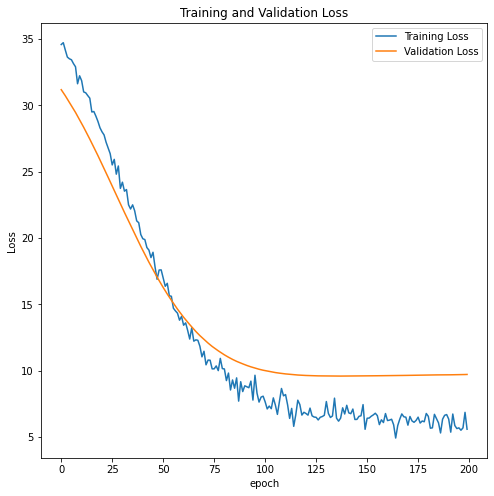

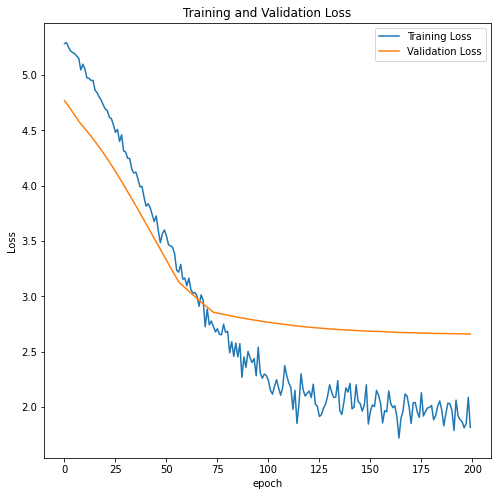

------------------------------------------------------------------------
Training for fold 3, seed 9 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 86ms/sample - loss: 35.2313 - mean_absolute_error: 5.3135 - val_loss: 30.5493 - val_mean_absolute_error: 4.7895
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.7597 - mean_absolute_error: 5.2785 - val_loss: 30.3183 - val_mean_absolute_error: 4.7696
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.7599 - mean_absolute_error: 5.2614 - val_loss: 30.0860 - val_mean_absolute_error: 4.7495
Epoch 4/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.0461 - mean_absolute_error: 5.1965 - val_loss: 29.8477 - val_mean_absolute_error: 4.7287
Epoch 5/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.0767 - mean_absolute_error: 5.2109 - val_loss: 29.6073 - val_mean_absolute_error: 4.7076
Epoch 6/200
15/1

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.5897 - mean_absolute_error: 3.4744 - val_loss: 16.1535 - val_mean_absolute_error: 3.2378
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.9971 - mean_absolute_error: 3.5616 - val_loss: 15.8920 - val_mean_absolute_error: 3.2165
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.9698 - mean_absolute_error: 3.5433 - val_loss: 15.6415 - val_mean_absolute_error: 3.1958
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.6815 - mean_absolute_error: 3.3707 - val_loss: 15.3924 - val_mean_absolute_error: 3.1748
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.1906 - mean_absolute_error: 3.4264 - val_loss: 15.1520 - val_mean_absolute_error: 3.1540
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.9094 - mean_absolute_error: 3.4203 - val_loss: 14.9186 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.9178 - mean_absolute_error: 2.4296 - val_loss: 9.8107 - val_mean_absolute_error: 2.6282
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8227 - mean_absolute_error: 2.1099 - val_loss: 9.7809 - val_mean_absolute_error: 2.6236
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7420 - mean_absolute_error: 2.1117 - val_loss: 9.7524 - val_mean_absolute_error: 2.6191
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.1065 - mean_absolute_error: 2.2113 - val_loss: 9.7301 - val_mean_absolute_error: 2.6154
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.2561 - mean_absolute_error: 2.2219 - val_loss: 9.7059 - val_mean_absolute_error: 2.6111
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.9786 - mean_absolute_error: 2.1414 - val_loss: 9.6830 - val_mean_absolute_error: 2.6068


15/15 [==============================] - 0s 5ms/sample - loss: 5.9445 - mean_absolute_error: 2.0047 - val_loss: 9.6551 - val_mean_absolute_error: 2.6395
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.2619 - mean_absolute_error: 1.7675 - val_loss: 9.6604 - val_mean_absolute_error: 2.6412
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.0890 - mean_absolute_error: 1.9962 - val_loss: 9.6645 - val_mean_absolute_error: 2.6425
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.4921 - mean_absolute_error: 1.8972 - val_loss: 9.6703 - val_mean_absolute_error: 2.6444
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5776 - mean_absolute_error: 1.8636 - val_loss: 9.6777 - val_mean_absolute_error: 2.6468
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.2386 - mean_absolute_error: 1.8183 - val_loss: 9.6856 - val_mean_absolute_error: 2.6492
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.1639 - mean_absolute_error: 1.7480 - val_loss: 9.9407 - val_mean_absolute_error: 2.7073
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.0005 - mean_absolute_error: 1.7405 - val_loss: 9.9504 - val_mean_absolute_error: 2.7092
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5099 - mean_absolute_error: 1.8228 - val_loss: 9.9547 - val_mean_absolute_error: 2.7101
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 4.7457 - mean_absolute_error: 1.6467 - val_loss: 9.9554 - val_mean_absolute_error: 2.7100
Spearman correlation: 0.143


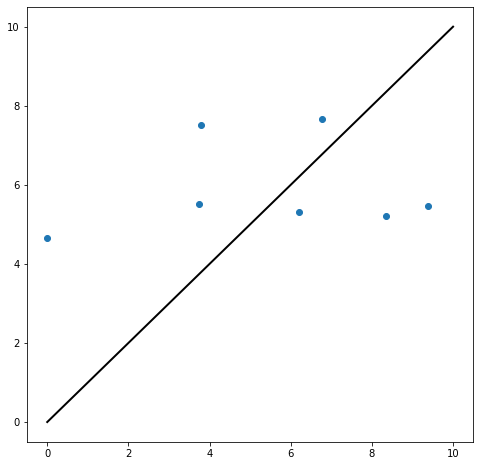

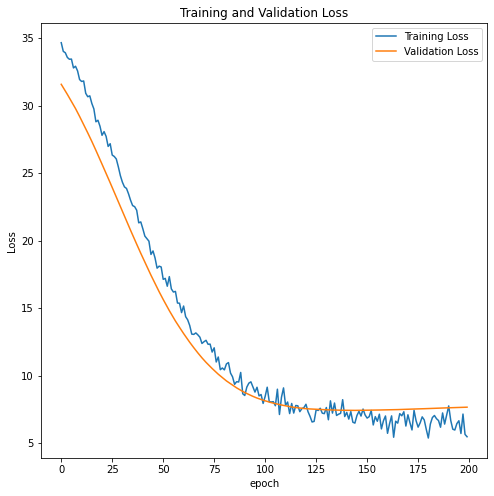

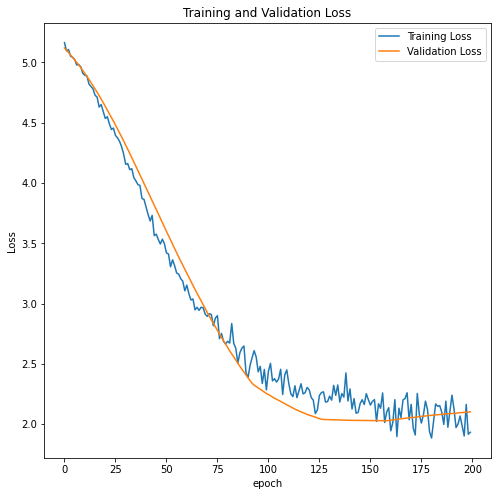

Overall spearman correlation: 0.178
------------------------------------------------------------------------
Training for fold 1, seed 10 ...
Train on 14 samples, validate on 8 samples
Epoch 1/200
14/14 [==============================] - 1s 94ms/sample - loss: 34.5597 - mean_absolute_error: 5.1633 - val_loss: 31.8965 - val_mean_absolute_error: 5.0799
Epoch 2/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.2452 - mean_absolute_error: 5.1358 - val_loss: 31.6475 - val_mean_absolute_error: 5.0602
Epoch 3/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.8687 - mean_absolute_error: 5.1113 - val_loss: 31.3927 - val_mean_absolute_error: 5.0400
Epoch 4/200
14/14 [==============================] - 0s 5ms/sample - loss: 34.1586 - mean_absolute_error: 5.1181 - val_loss: 31.1458 - val_mean_absolute_error: 5.0203
Epoch 5/200
14/14 [==============================] - 0s 5ms/sample - loss: 33.4635 - mean_absolute_error: 5.0594 - val_loss: 30.8843 - val_mean_ab

Epoch 49/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.5004 - mean_absolute_error: 3.5560 - val_loss: 16.5553 - val_mean_absolute_error: 3.6003
Epoch 50/200
14/14 [==============================] - 0s 5ms/sample - loss: 18.1846 - mean_absolute_error: 3.5447 - val_loss: 16.2553 - val_mean_absolute_error: 3.5626
Epoch 51/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.2905 - mean_absolute_error: 3.4064 - val_loss: 15.9635 - val_mean_absolute_error: 3.5255
Epoch 52/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.7201 - mean_absolute_error: 3.4673 - val_loss: 15.6724 - val_mean_absolute_error: 3.4878
Epoch 53/200
14/14 [==============================] - 0s 5ms/sample - loss: 17.3243 - mean_absolute_error: 3.4399 - val_loss: 15.3909 - val_mean_absolute_error: 3.4508
Epoch 54/200
14/14 [==============================] - 0s 5ms/sample - loss: 16.7156 - mean_absolute_error: 3.4348 - val_loss: 15.1238 - val_mean_absolute_error:

Epoch 98/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.3295 - mean_absolute_error: 2.6639 - val_loss: 8.2267 - val_mean_absolute_error: 2.2773
Epoch 99/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.0225 - mean_absolute_error: 2.4126 - val_loss: 8.1636 - val_mean_absolute_error: 2.2627
Epoch 100/200
14/14 [==============================] - 0s 5ms/sample - loss: 9.0885 - mean_absolute_error: 2.5594 - val_loss: 8.1041 - val_mean_absolute_error: 2.2487
Epoch 101/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.3003 - mean_absolute_error: 2.4930 - val_loss: 8.0498 - val_mean_absolute_error: 2.2356
Epoch 102/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.0108 - mean_absolute_error: 2.3917 - val_loss: 7.9934 - val_mean_absolute_error: 2.2217
Epoch 103/200
14/14 [==============================] - 0s 5ms/sample - loss: 8.2148 - mean_absolute_error: 2.3839 - val_loss: 7.9430 - val_mean_absolute_error: 2.2126


14/14 [==============================] - 0s 5ms/sample - loss: 7.3112 - mean_absolute_error: 2.1681 - val_loss: 7.0460 - val_mean_absolute_error: 2.0510
Epoch 148/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.3390 - mean_absolute_error: 2.1903 - val_loss: 7.0402 - val_mean_absolute_error: 2.0518
Epoch 149/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.3318 - mean_absolute_error: 2.1356 - val_loss: 7.0367 - val_mean_absolute_error: 2.0524
Epoch 150/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.5082 - mean_absolute_error: 2.2589 - val_loss: 7.0290 - val_mean_absolute_error: 2.0534
Epoch 151/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.0844 - mean_absolute_error: 2.1648 - val_loss: 7.0240 - val_mean_absolute_error: 2.0541
Epoch 152/200
14/14 [==============================] - 0s 5ms/sample - loss: 7.4360 - mean_absolute_error: 2.2151 - val_loss: 7.0229 - val_mean_absolute_error: 2.0543
Epoch 153/20

Epoch 197/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.6299 - mean_absolute_error: 1.9610 - val_loss: 7.0164 - val_mean_absolute_error: 2.0799
Epoch 198/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.4875 - mean_absolute_error: 2.0771 - val_loss: 7.0171 - val_mean_absolute_error: 2.0806
Epoch 199/200
14/14 [==============================] - 0s 5ms/sample - loss: 6.3624 - mean_absolute_error: 2.0706 - val_loss: 7.0190 - val_mean_absolute_error: 2.0810
Epoch 200/200
14/14 [==============================] - 0s 5ms/sample - loss: 5.6367 - mean_absolute_error: 1.8590 - val_loss: 7.0202 - val_mean_absolute_error: 2.0816
Spearman correlation: 0.143


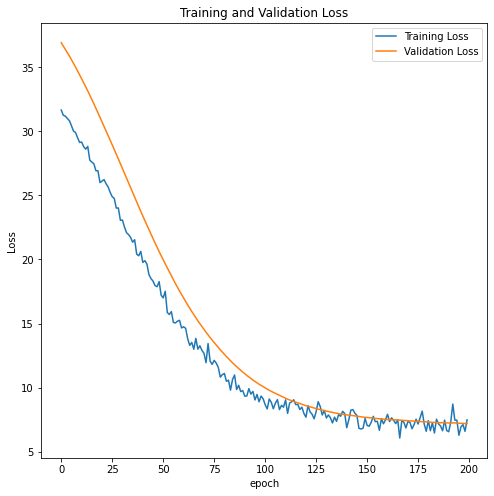

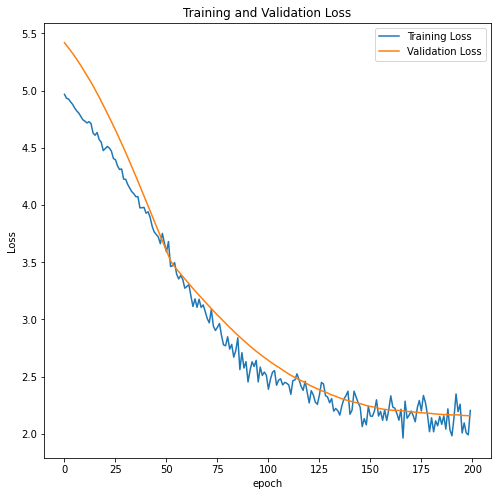

------------------------------------------------------------------------
Training for fold 2, seed 10 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 88ms/sample - loss: 34.6778 - mean_absolute_error: 5.2795 - val_loss: 30.7863 - val_mean_absolute_error: 4.7753
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.6776 - mean_absolute_error: 5.2751 - val_loss: 30.5531 - val_mean_absolute_error: 4.7512
Epoch 3/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.5518 - mean_absolute_error: 5.2572 - val_loss: 30.3182 - val_mean_absolute_error: 4.7268
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 34.2307 - mean_absolute_error: 5.2451 - val_loss: 30.0758 - val_mean_absolute_error: 4.7014
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 34.1072 - mean_absolute_error: 5.2172 - val_loss: 29.8255 - val_mean_absolute_error: 4.6750
Epoch 6/200
15/

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 18.3192 - mean_absolute_error: 3.5756 - val_loss: 16.2055 - val_mean_absolute_error: 3.4087
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.7848 - mean_absolute_error: 3.4493 - val_loss: 15.9340 - val_mean_absolute_error: 3.3749
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.4800 - mean_absolute_error: 3.5036 - val_loss: 15.6704 - val_mean_absolute_error: 3.3414
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 17.0747 - mean_absolute_error: 3.4840 - val_loss: 15.4111 - val_mean_absolute_error: 3.3078
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.5269 - mean_absolute_error: 3.4519 - val_loss: 15.1554 - val_mean_absolute_error: 3.2740
Epoch 54/200
15/15 [==============================] - 0s 4ms/sample - loss: 15.1851 - mean_absolute_error: 3.2543 - val_loss: 14.9039 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.6973 - mean_absolute_error: 2.3026 - val_loss: 9.4114 - val_mean_absolute_error: 2.5516
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7076 - mean_absolute_error: 2.4525 - val_loss: 9.3710 - val_mean_absolute_error: 2.5397
Epoch 100/200
15/15 [==============================] - 0s 4ms/sample - loss: 8.0679 - mean_absolute_error: 2.2866 - val_loss: 9.3366 - val_mean_absolute_error: 2.5293
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8974 - mean_absolute_error: 2.2917 - val_loss: 9.3081 - val_mean_absolute_error: 2.5201
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.9120 - mean_absolute_error: 2.2899 - val_loss: 9.2780 - val_mean_absolute_error: 2.5100
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.0870 - mean_absolute_error: 2.3373 - val_loss: 9.2503 - val_mean_absolute_error: 2.5001


15/15 [==============================] - 0s 5ms/sample - loss: 6.4123 - mean_absolute_error: 2.0302 - val_loss: 9.0902 - val_mean_absolute_error: 2.4262
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7258 - mean_absolute_error: 2.0929 - val_loss: 9.0990 - val_mean_absolute_error: 2.4252
Epoch 149/200
15/15 [==============================] - 0s 6ms/sample - loss: 6.2425 - mean_absolute_error: 1.9937 - val_loss: 9.1048 - val_mean_absolute_error: 2.4243
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.3298 - mean_absolute_error: 2.0485 - val_loss: 9.1078 - val_mean_absolute_error: 2.4237
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.7028 - mean_absolute_error: 1.9567 - val_loss: 9.1138 - val_mean_absolute_error: 2.4223
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6338 - mean_absolute_error: 2.1273 - val_loss: 9.1176 - val_mean_absolute_error: 2.4221
Epoch 153/20

Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.2621 - mean_absolute_error: 2.0370 - val_loss: 9.3062 - val_mean_absolute_error: 2.4029
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.5247 - mean_absolute_error: 1.8587 - val_loss: 9.3131 - val_mean_absolute_error: 2.4024
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.1437 - mean_absolute_error: 1.9198 - val_loss: 9.3162 - val_mean_absolute_error: 2.4023
Epoch 200/200
15/15 [==============================] - 0s 4ms/sample - loss: 5.8720 - mean_absolute_error: 2.0363 - val_loss: 9.3216 - val_mean_absolute_error: 2.4019
Spearman correlation: -0.250


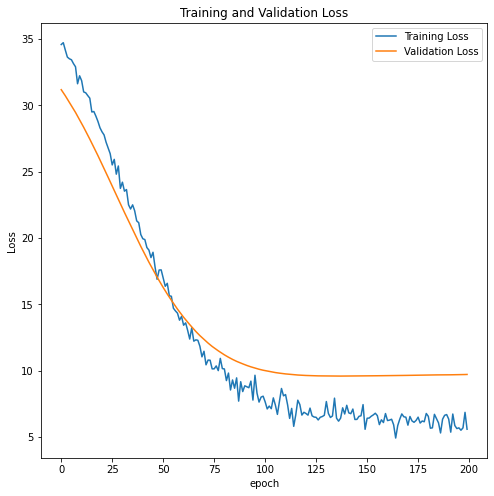

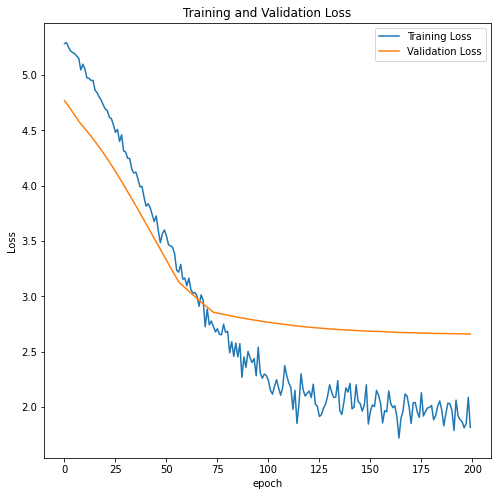

------------------------------------------------------------------------
Training for fold 3, seed 10 ...
Train on 15 samples, validate on 7 samples
Epoch 1/200
15/15 [==============================] - 1s 91ms/sample - loss: 32.0353 - mean_absolute_error: 4.9906 - val_loss: 37.8500 - val_mean_absolute_error: 5.5022
Epoch 2/200
15/15 [==============================] - 0s 4ms/sample - loss: 31.2775 - mean_absolute_error: 4.9245 - val_loss: 37.6082 - val_mean_absolute_error: 5.4802
Epoch 3/200
15/15 [==============================] - 0s 5ms/sample - loss: 30.9552 - mean_absolute_error: 4.8872 - val_loss: 37.3535 - val_mean_absolute_error: 5.4569
Epoch 4/200
15/15 [==============================] - 0s 5ms/sample - loss: 30.9382 - mean_absolute_error: 4.8910 - val_loss: 37.0951 - val_mean_absolute_error: 5.4332
Epoch 5/200
15/15 [==============================] - 0s 4ms/sample - loss: 30.7775 - mean_absolute_error: 4.8925 - val_loss: 36.8403 - val_mean_absolute_error: 5.4097
Epoch 6/200
15/

Epoch 49/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.7388 - mean_absolute_error: 3.5395 - val_loss: 22.0050 - val_mean_absolute_error: 3.7995
Epoch 50/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.8230 - mean_absolute_error: 3.5882 - val_loss: 21.6810 - val_mean_absolute_error: 3.7566
Epoch 51/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.0785 - mean_absolute_error: 3.4682 - val_loss: 21.3549 - val_mean_absolute_error: 3.7129
Epoch 52/200
15/15 [==============================] - 0s 5ms/sample - loss: 16.4288 - mean_absolute_error: 3.5163 - val_loss: 21.0454 - val_mean_absolute_error: 3.6833
Epoch 53/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.9494 - mean_absolute_error: 3.4417 - val_loss: 20.7398 - val_mean_absolute_error: 3.6571
Epoch 54/200
15/15 [==============================] - 0s 5ms/sample - loss: 15.7947 - mean_absolute_error: 3.4640 - val_loss: 20.4388 - val_mean_absolute_error:

Epoch 98/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.1538 - mean_absolute_error: 2.4341 - val_loss: 11.8174 - val_mean_absolute_error: 2.9837
Epoch 99/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.8084 - mean_absolute_error: 2.3976 - val_loss: 11.7167 - val_mean_absolute_error: 2.9731
Epoch 100/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7962 - mean_absolute_error: 2.4687 - val_loss: 11.6246 - val_mean_absolute_error: 2.9634
Epoch 101/200
15/15 [==============================] - 0s 5ms/sample - loss: 8.7153 - mean_absolute_error: 2.4239 - val_loss: 11.5375 - val_mean_absolute_error: 2.9541
Epoch 102/200
15/15 [==============================] - 0s 5ms/sample - loss: 9.4688 - mean_absolute_error: 2.5037 - val_loss: 11.4534 - val_mean_absolute_error: 2.9451
Epoch 103/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.7928 - mean_absolute_error: 2.3036 - val_loss: 11.3618 - val_mean_absolute_error: 2

Epoch 147/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6929 - mean_absolute_error: 2.1025 - val_loss: 9.2297 - val_mean_absolute_error: 2.6473
Epoch 148/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.8409 - mean_absolute_error: 2.2908 - val_loss: 9.2206 - val_mean_absolute_error: 2.6458
Epoch 149/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.6901 - mean_absolute_error: 2.2060 - val_loss: 9.2010 - val_mean_absolute_error: 2.6425
Epoch 150/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.8142 - mean_absolute_error: 2.1177 - val_loss: 9.1683 - val_mean_absolute_error: 2.6366
Epoch 151/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0911 - mean_absolute_error: 2.0879 - val_loss: 9.1376 - val_mean_absolute_error: 2.6313
Epoch 152/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.0695 - mean_absolute_error: 2.1642 - val_loss: 9.1247 - val_mean_absolute_error: 2.629

15/15 [==============================] - 0s 5ms/sample - loss: 7.2533 - mean_absolute_error: 2.2003 - val_loss: 8.6186 - val_mean_absolute_error: 2.5328
Epoch 197/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.6914 - mean_absolute_error: 2.0081 - val_loss: 8.6048 - val_mean_absolute_error: 2.5299
Epoch 198/200
15/15 [==============================] - 0s 5ms/sample - loss: 7.5523 - mean_absolute_error: 2.2183 - val_loss: 8.5947 - val_mean_absolute_error: 2.5277
Epoch 199/200
15/15 [==============================] - 0s 5ms/sample - loss: 5.8345 - mean_absolute_error: 1.8730 - val_loss: 8.5877 - val_mean_absolute_error: 2.5261
Epoch 200/200
15/15 [==============================] - 0s 5ms/sample - loss: 6.7310 - mean_absolute_error: 2.0582 - val_loss: 8.5785 - val_mean_absolute_error: 2.5242
Spearman correlation: 0.286


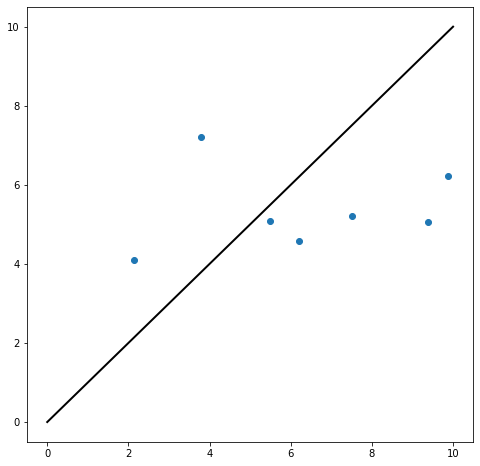

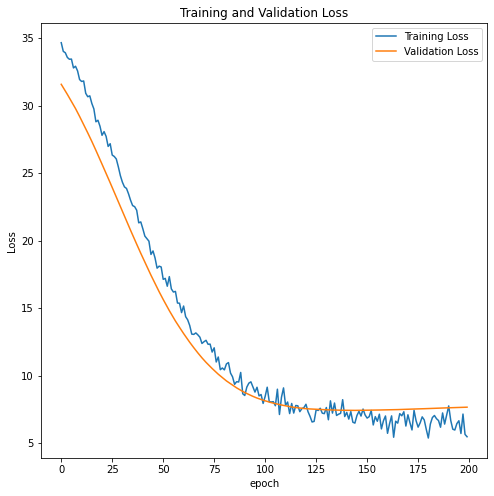

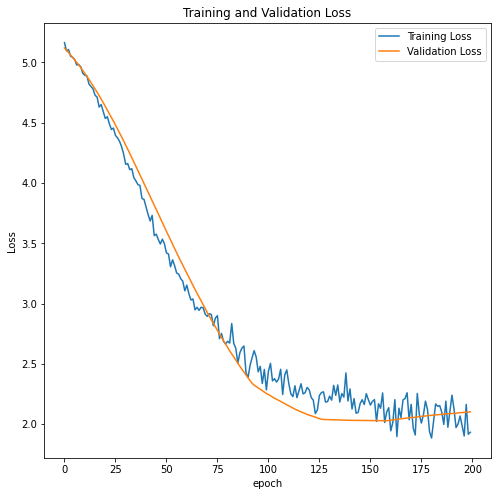

Overall spearman correlation: 0.088


In [22]:
##### use mae as the loss function ####



loss = []
val_loss = []
mse = []
val_mse = []
overall_cor_res = []

# K-fold Cross Validation model evaluation

for k in range(0,10):
    
    exp_train = [0]*3
    exp_test = [0]*3
    auc_train = [0]*3
    auc_test = [0]*3
    pred_res = []
    loss = []
    val_loss = []
    mse = []
    val_mse = []
      
    for fold_no in range(0,3):
    
        # split dataset
        exp_train[fold_no], exp_test[fold_no] = impress.iloc[train_index[k][fold_no],:], impress.iloc[test_index[k][fold_no],:]
        auc_train[fold_no], auc_test[fold_no] = auc_norm[train_index[k][fold_no]], auc_norm[test_index[k][fold_no]]
    
    
        # normalize
        exp_train[fold_no] = Standard.fit_transform(exp_train[fold_no])
        exp_test[fold_no] = Standard.fit_transform(exp_test[fold_no])
    
    
        # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Training for fold {(fold_no+1)}, seed {(k+1)} ...')
    
        # Create a basic model instance
        pred_model = create_model2(l2 = 0.0001,l1=0.0001,opt = tf.keras.optimizers.SGD(lr = 0.0001))
        #

    
        # es = EarlyStopping(monitor='val_loss', verbose=1, patience=5) # mode='min', 
        refine_model = pred_model.fit(x=exp_train[fold_no], y=auc_train[fold_no], epochs=200, batch_size=32,
                                  validation_data=(exp_test[fold_no],auc_test[fold_no]))

    
        # predict and evaluate
        pred = pred_model.predict(exp_test[fold_no])
        pred = pd.DataFrame(pred)
        pred_res.append(pred)
        test = auc_test[fold_no].reset_index(drop = True)
        # print(R2(test,pred[0]))
    
        # calculate Spearman's correlation
        corr, _ = spearmanr(test, pred[0])
        print('Spearman correlation: %.3f' % corr)
    
        plt.figure(figsize=(8, 8))
        plt.scatter(test,pred[0])
        plt.plot([0, 10], [0, 10], 'k-', lw=2)
        plt.show()
    
        # plot loss train and validate
        loss.append(refine_model.history['loss'])
        val_loss.append(refine_model.history['val_loss'])
        plt_loss(loss[fold_no],val_loss[fold_no],fold_no+1)
    
        # plot acc train and validate
        mse.append(refine_model.history['mean_absolute_error'])
        val_mse.append(refine_model.history['val_mean_absolute_error'])
        plt_loss(mse[fold_no],val_mse[fold_no],fold_no+1)

    # test_all
    test_all = np.concatenate([auc_test[0],auc_test[1],auc_test[2]])#,auc_test[3],auc_test[4]
    # pred_all 
    pred_all = np.concatenate([pred_res[0],pred_res[1],pred_res[2]])#,pred_res[3],pred_res[4]
    overall_cor, _ = spearmanr(test_all, pred_all)
    overall_cor_res.append(overall_cor)
    print('Overall spearman correlation: %.3f' % overall_cor)


In [23]:
##### use mae as the loss function ####
seed_num = 1000

# normalize
impress_std = Standard.fit_transform(impress)
    
# Create a basic model instance
pred_model = create_model2(l2 = 0.0001,l1=0.0001,opt = tf.keras.optimizers.SGD(lr = 0.0001))#
  
refine_model = pred_model.fit(x=impress_std, y=auc_norm, epochs=200, batch_size=32)


Train on 22 samples
Epoch 1/200
22/22 [==============================] - 0s 7ms/sample - loss: 33.7768 - mean_absolute_error: 5.1535
Epoch 2/200
22/22 [==============================] - 0s 3ms/sample - loss: 33.5767 - mean_absolute_error: 5.1226
Epoch 3/200
22/22 [==============================] - 0s 2ms/sample - loss: 32.8873 - mean_absolute_error: 5.0738
Epoch 4/200
22/22 [==============================] - 0s 2ms/sample - loss: 32.7676 - mean_absolute_error: 5.0584
Epoch 5/200
22/22 [==============================] - 0s 2ms/sample - loss: 32.4061 - mean_absolute_error: 5.0461
Epoch 6/200
22/22 [==============================] - 0s 3ms/sample - loss: 32.5204 - mean_absolute_error: 5.0198
Epoch 7/200
22/22 [==============================] - 0s 3ms/sample - loss: 31.8038 - mean_absolute_error: 4.9716
Epoch 8/200
22/22 [==============================] - 0s 2ms/sample - loss: 31.7890 - mean_absolute_error: 4.9637
Epoch 9/200
22/22 [==============================] - 0s 3ms/sample - loss: 3

Epoch 73/200
22/22 [==============================] - 0s 2ms/sample - loss: 11.4540 - mean_absolute_error: 2.8326
Epoch 74/200
22/22 [==============================] - 0s 3ms/sample - loss: 11.6850 - mean_absolute_error: 2.8855
Epoch 75/200
22/22 [==============================] - 0s 2ms/sample - loss: 11.3467 - mean_absolute_error: 2.8376
Epoch 76/200
22/22 [==============================] - 0s 2ms/sample - loss: 11.2168 - mean_absolute_error: 2.8295
Epoch 77/200
22/22 [==============================] - 0s 2ms/sample - loss: 11.6227 - mean_absolute_error: 2.8741
Epoch 78/200
22/22 [==============================] - 0s 3ms/sample - loss: 11.1179 - mean_absolute_error: 2.7859
Epoch 79/200
22/22 [==============================] - 0s 2ms/sample - loss: 11.0653 - mean_absolute_error: 2.7658
Epoch 80/200
22/22 [==============================] - 0s 2ms/sample - loss: 10.5589 - mean_absolute_error: 2.7313
Epoch 81/200
22/22 [==============================] - 0s 2ms/sample - loss: 10.2911 - me

Epoch 145/200
22/22 [==============================] - 0s 3ms/sample - loss: 7.8640 - mean_absolute_error: 2.3083
Epoch 146/200
22/22 [==============================] - 0s 3ms/sample - loss: 6.8422 - mean_absolute_error: 2.1542
Epoch 147/200
22/22 [==============================] - 0s 2ms/sample - loss: 7.1644 - mean_absolute_error: 2.1437
Epoch 148/200
22/22 [==============================] - 0s 2ms/sample - loss: 7.1391 - mean_absolute_error: 2.1612
Epoch 149/200
22/22 [==============================] - 0s 3ms/sample - loss: 7.2443 - mean_absolute_error: 2.1233
Epoch 150/200
22/22 [==============================] - 0s 2ms/sample - loss: 7.5288 - mean_absolute_error: 2.1825
Epoch 151/200
22/22 [==============================] - 0s 2ms/sample - loss: 7.5927 - mean_absolute_error: 2.1825
Epoch 152/200
22/22 [==============================] - 0s 2ms/sample - loss: 7.3397 - mean_absolute_error: 2.1679
Epoch 153/200
22/22 [==============================] - 0s 2ms/sample - loss: 7.1655 - me

In [23]:
pred_model.save_weights("impress_model_oxa_tmz_GDSC_impress.h5")

In [24]:
pred_model.predict(impress_std)

array([[4.51377  ],
       [5.940578 ],
       [4.3148017],
       [5.76694  ],
       [5.1872888],
       [4.983854 ],
       [5.6010237],
       [5.161062 ],
       [4.9496903],
       [7.2072773],
       [5.199107 ],
       [6.767606 ],
       [6.056578 ],
       [7.266748 ],
       [4.493644 ],
       [5.2241464],
       [7.104906 ],
       [5.0004983],
       [5.21434  ],
       [7.4346943],
       [5.8008056],
       [6.8988094]], dtype=float32)

In [25]:
spearmanr(pred_model.predict(impress_std), auc_norm)

SpearmanrResult(correlation=0.4138904573687183, pvalue=0.05550702963051301)

In [22]:
weights = pred_model.layers[0].get_weights()[0]
weights

array([[ 3.3402406e-02,  1.7350014e-02, -2.7083652e-02, ...,
        -2.2380562e-02, -3.2760154e-02,  1.2678477e-02],
       [ 4.5045469e-02,  1.0601027e-02, -7.7463854e-03, ...,
        -3.3364143e-02,  2.1613847e-02,  2.6881112e-02],
       [-3.5637297e-02,  2.2816420e-02, -2.6919927e-02, ...,
         1.7334936e-02,  1.8140023e-05, -2.7790094e-02],
       ...,
       [-4.1226350e-02,  1.0272656e-02, -7.3351511e-03, ...,
         1.2220927e-02,  6.5379036e-03, -1.1993332e-02],
       [-1.2136519e-02, -3.9201252e-02, -2.2579858e-02, ...,
         1.3759451e-02, -1.2612044e-02,  1.8524405e-02],
       [ 1.0931246e-02, -7.7939420e-03,  3.0070696e-02, ...,
         1.9139703e-02,  2.8096417e-02, -4.8838165e-03]], dtype=float32)

In [26]:
pred_model.layers[0].get_weights()[0]

array([[ 3.3403546e-02,  1.7349720e-02, -2.7083565e-02, ...,
        -2.2377009e-02, -3.2760162e-02,  1.2678408e-02],
       [ 4.5049310e-02,  1.0598936e-02, -7.7443738e-03, ...,
        -3.3361752e-02,  2.1613995e-02,  2.6881034e-02],
       [-3.5639443e-02,  2.2814661e-02, -2.6925355e-02, ...,
         1.7332047e-02,  1.7166765e-05, -2.7790232e-02],
       ...,
       [-4.1231114e-02,  1.0266610e-02, -7.3374952e-03, ...,
         1.2218985e-02,  6.5386049e-03, -1.1993454e-02],
       [-1.2128289e-02, -3.9202780e-02, -2.2582324e-02, ...,
         1.3758829e-02, -1.2612797e-02,  1.8524142e-02],
       [ 1.0929765e-02, -7.7921096e-03,  3.0069187e-02, ...,
         1.9136764e-02,  2.8096223e-02, -4.8835017e-03]], dtype=float32)

In [27]:
gene_weights_sum = []
for i in range(0,10232):
    weights_sum = np.sum(abs(weights[i]))
    gene_weights_sum.append(weights_sum)
gene_weights_sum

[20.427242,
 20.923023,
 19.35638,
 17.698608,
 19.85451,
 20.489578,
 20.69466,
 22.471972,
 19.888079,
 20.283947,
 20.529308,
 19.412796,
 20.422848,
 20.774778,
 19.114977,
 19.465742,
 20.188374,
 18.961264,
 19.277737,
 19.991837,
 20.322979,
 20.403553,
 19.072145,
 20.193607,
 19.2071,
 19.599518,
 19.636976,
 20.091782,
 19.242176,
 19.245876,
 18.861942,
 19.316345,
 19.753292,
 19.361298,
 20.571556,
 20.107193,
 19.120094,
 20.219715,
 20.304031,
 19.344915,
 16.842154,
 18.983376,
 19.628763,
 19.590118,
 19.107307,
 20.221186,
 19.260979,
 19.917599,
 18.746656,
 18.722801,
 20.607517,
 19.105837,
 20.208355,
 19.174873,
 19.8727,
 19.931442,
 20.232384,
 20.055801,
 18.527454,
 15.480354,
 18.731468,
 18.550274,
 20.249254,
 19.75082,
 19.895336,
 18.864983,
 20.116577,
 20.29411,
 20.01818,
 19.77734,
 20.581772,
 18.285358,
 20.373333,
 19.692595,
 20.251942,
 20.676083,
 19.969646,
 20.603376,
 19.741457,
 19.59359,
 18.476913,
 19.779095,
 20.145508,
 21.075018,
 19.

In [28]:
weights_final = pd.DataFrame( {'genes': impress.columns, 'weight': gene_weights_sum})
weights_final

genes     weight
0         TSPAN6  20.427242
1           DPM1  20.923023
2          SCYL3  19.356380
3            FGR  17.698608
4            CFH  19.854509
...          ...        ...
10227  LINC00657  21.135759
10228        MIA  19.710178
10229  LINC00514  19.860497
10230  LINC00526  20.852802
10231     UBL5P2  19.446217

[10232 rows x 2 columns]

In [29]:
weights_final.to_csv("impressTMZ_hgccTMZ_gdscOXA_weights_final.csv")